# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Aswin  Setiawan
- Email: aswinrsixxx@gmail.com
- Id Dicoding: -

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
# Mengimpor library untuk manipulasi data
import pandas as pd

# Mengimpor library untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Mengimpor library untuk membangun pipeline machine learning
from sklearn.pipeline import Pipeline

# Mengimpor library untuk membuat custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# Mengimpor library untuk operasi numerik
import numpy as np

# Mengimpor library untuk menyimpan dan memuat model
import joblib

# Mengimpor library untuk membagi data latih dan uji
from sklearn.model_selection import train_test_split

# Mengimpor library untuk preprocessing data
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder

# Mengimpor library untuk interaksi sistem operasi (jika diperlukan)
import os

# Mengimpor library untuk menangani data imbalance
from imblearn.over_sampling import SMOTE

# Mengimpor library untuk menggabungkan transformer
from sklearn.compose import ColumnTransformer

# Mengimpor library untuk menggunakan model Random Forest
from sklearn.ensemble import RandomForestClassifier

# Mengimpor library untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

### Menyiapkan data yang akan digunakan

In [ ]:
# Membaca data dari file CSV dan menyimpannya dalam DataFrame Pandas bernama 'students_df'
dataset = pd.read_csv('https://github.com/dicodingacademy/dicoding_dataset/blob/f4a7541bc3dfca0012e20778e135c03b3e76dc67/students_performance/data.csv?raw=true', sep=';')

## Data Understanding

In [ ]:
# Menampilkan informasi tentang dataset, seperti jumlah baris, kolom, tipe data, dan penggunaan memori.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
# Menghitung dan menampilkan jumlah baris duplikat dalam dataset.
dataset.duplicated().sum()

np.int64(0)

In [ ]:
# Menghitung dan menampilkan jumlah nilai yang hilang (missing values) di setiap kolom dataset.
dataset.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Insight:

- Dataset relatif bersih karena tidak ada data duplikat dan missing values.
- Sebaran data dan outlier perlu diinvestigasi lebih lanjut pada tahap eksplorasi data.
- Korelasi antar variabel perlu dianalisis untuk mengidentifikasi fitur penting.
- Data imbalance pada target variabel 'Status' mungkin perlu ditangani untuk meningkatkan performa model.

## Data Preparation/Processing

Mengubah nilai numerik pada kolom kategorikal menjadi nilai teks yang lebih deskriptif dan mudah dipahami.

In [ ]:
# Mappings for categorical columns
marital_status_mapping = {
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'
}

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2 (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

daytime_evening_mapping = {
    1: 'daytime', 0: 'evening'
}

previous_qualification_mapping = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

nationality_mapping = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
    17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
    26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
}

qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'blank',
    122: 'Health professionals',
    123: 'teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

displaced_mapping = {0: 'no', 1: 'yes'}

educational_special_needs = {0: 'no', 1: 'yes'}

debtor = {0: 'no', 1: 'yes'}

tuition_fees_up_to_date = {0: 'no', 1: 'yes'}

gender = {0: 'female', 1: 'male'}

scholarship_holder = {0: 'no', 1: 'yes'}

international = {0: 'no', 1: 'yes'}

# Apply mappings to the columns
dataset['Marital_status'] = dataset['Marital_status'].map(marital_status_mapping)
dataset['Application_mode'] = dataset['Application_mode'].map(application_mode_mapping)
dataset['Course'] = dataset['Course'].map(course_mapping)
dataset['Daytime_evening_attendance'] = dataset['Daytime_evening_attendance'].map(daytime_evening_mapping)
dataset['Previous_qualification'] = dataset['Previous_qualification'].map(previous_qualification_mapping)
dataset['Nacionality'] = dataset['Nacionality'].map(nationality_mapping)
dataset['Mothers_qualification'] = dataset['Mothers_qualification'].map(qualification_mapping)
dataset['Fathers_qualification'] = dataset['Fathers_qualification'].map(qualification_mapping)
dataset['Mothers_occupation'] = dataset['Mothers_occupation'].map(occupation_mapping)
dataset['Fathers_occupation'] = dataset['Fathers_occupation'].map(occupation_mapping)
dataset['Displaced'] = dataset['Displaced'].map(displaced_mapping)
dataset['Educational_special_needs'] = dataset['Educational_special_needs'].map(educational_special_needs)
dataset['Debtor'] = dataset['Debtor'].map(debtor)
dataset['Tuition_fees_up_to_date'] = dataset['Tuition_fees_up_to_date'].map(tuition_fees_up_to_date)
dataset['Gender'] = dataset['Gender'].map(gender)
dataset['Scholarship_holder'] = dataset['Scholarship_holder'].map(scholarship_holder)
dataset['International'] = dataset['International'].map(international)

dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Menampilkan informasi ringkas tentang DataFrame setelah perubahan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4419 non-null   o

Mengubah tipe data dari beberapa kolom dalam DataFrame dataset menjadi tipe data category.

In [ ]:
# Mendefinisikan daftar kolom yang akan diubah tipe datanya menjadi 'category'.
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade',
       'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status']

# Mengubah tipe data kolom yang telah didefinisikan menjadi 'category'.
dataset[col] = dataset[col].astype('category')

# Menampilkan informasi ringkas tentang DataFrame setelah perubahan tipe data.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   category
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4419 n

In [ ]:
# Menampilkan deskripsi statistik untuk kolom numerik saja (mengecualikan kolom kategori) dengan transpos untuk tampilan yang lebih mudah dibaca.
dataset.describe(exclude='category').T

,count,mean,std,min,25%,50%,75%,max
Admission_grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular_units_1st_sem_evaluations,4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular_units_1st_sem_approved,4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular_units_1st_sem_without_evaluations,4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000
Curricular_units_2nd_sem_credited,4424.0,0.541817,1.918546,0.00,0.00,0.000000,0.000000,19.000000
Curricular_units_2nd_sem_enrolled,4424.0,6.232143,2.195951,0.00,5.00,6.000000,7.000000,23.000000


In [ ]:
dataset.describe(include='category').T # Menampilkan deskripsi statistik untuk kolom kategori saja, dengan transpos untuk tampilan yang lebih mudah dibaca.

,count,unique,top,freq
Marital_status,4424,6,single,3919
Application_mode,4424,18,1st phase - general contingent,1708
Application_order,4424,8,1,3026
Course,4424,17,Nursing,766
Daytime_evening_attendance,4424,2,daytime,3941
Previous_qualification,4424,17,Secondary education,3717
Previous_qualification_grade,4424.0,101.0,133.1,491.0
Nacionality,4424,21,Portuguese,4314
Mothers_qualification,4424,29,Secondary Education - 12th Year of Schooling o...,1069
Fathers_qualification,4419,29,Basic education 1st cycle (4th/5th year) or eq...,1209


In [ ]:
dataset.to_csv('school.csv', index=False) # Menyimpan DataFrame ke file CSV bernama 'school.csv' tanpa menyertakan indeks.

In [ ]:
# Menghitung jumlah kolom
num_columns = dataset.shape[1]
print(f"Jumlah kolom: {num_columns}") # Menampilkan jumlah kolom dalam dataset.

Jumlah kolom: 37


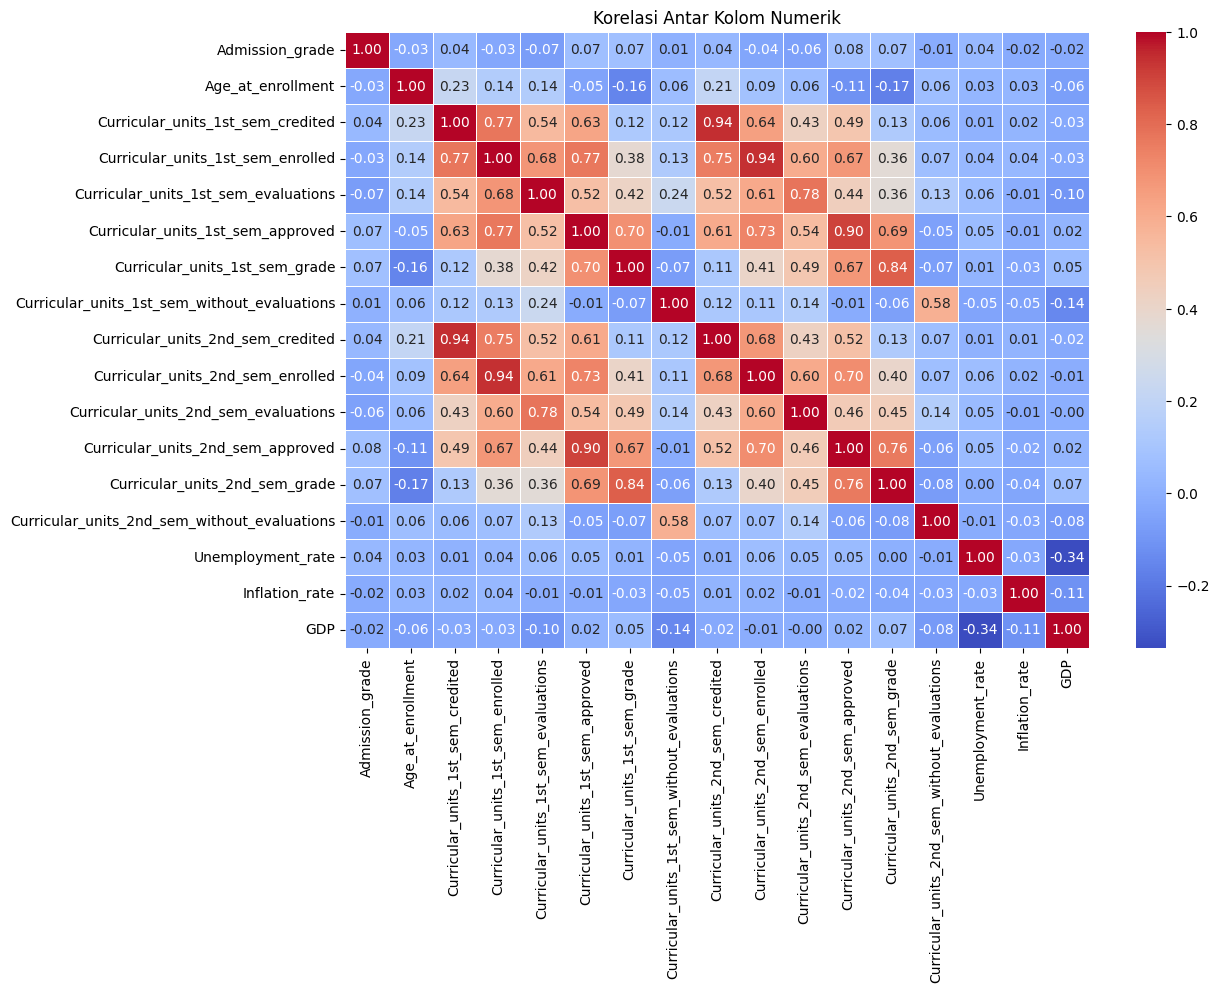

In [ ]:
# Pilih kolom numerik saja
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns # Mengambil kolom numerik dari dataset dan menyimpannya dalam variabel numerical_cols.

# Menghitung korelasi antar kolom numerik
correlation_matrix = dataset[numerical_cols].corr() # Menghitung matriks korelasi untuk kolom numerik.

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8)) # Membuat figure dengan ukuran 12x8.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Membuat heatmap korelasi dengan anotasi, colormap, dan format angka.
plt.title('Korelasi Antar Kolom Numerik') # Menambahkan judul heatmap.
plt.show() # Menampilkan heatmap korelasi antar kolom numerik.

In [ ]:
# Daftar kolom numerik yang telah dipilih sebelumnya.
numerical_cols

Index(['Admission_grade', 'Age_at_enrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='object')

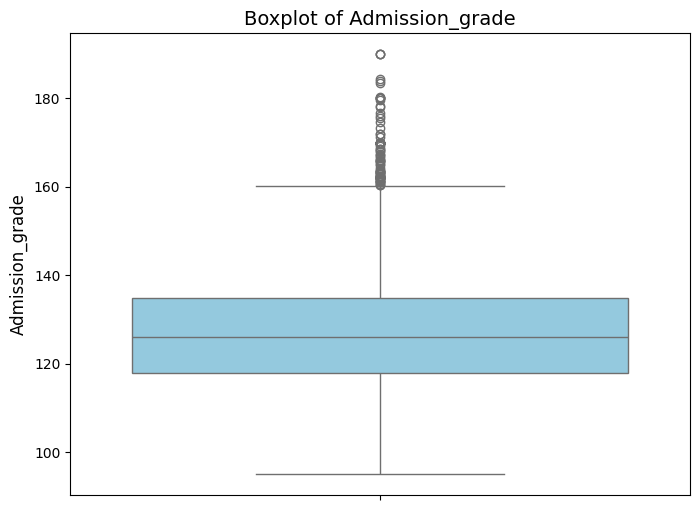

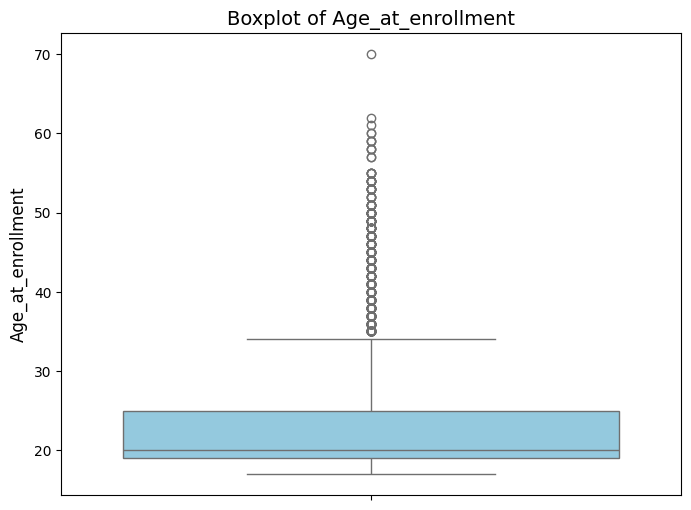

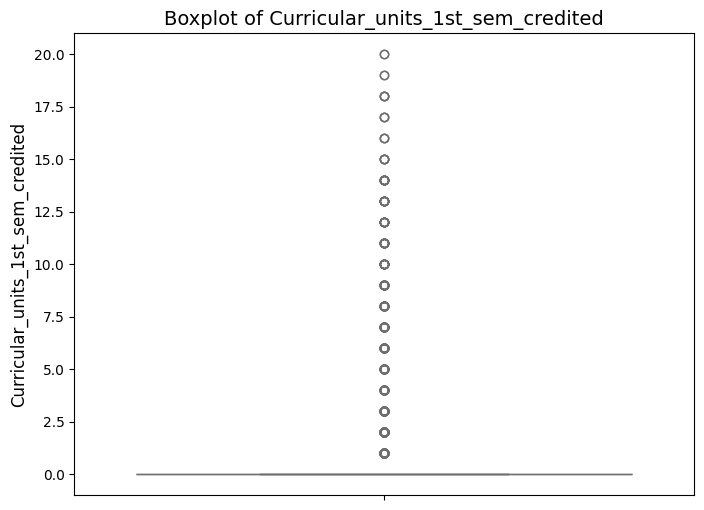

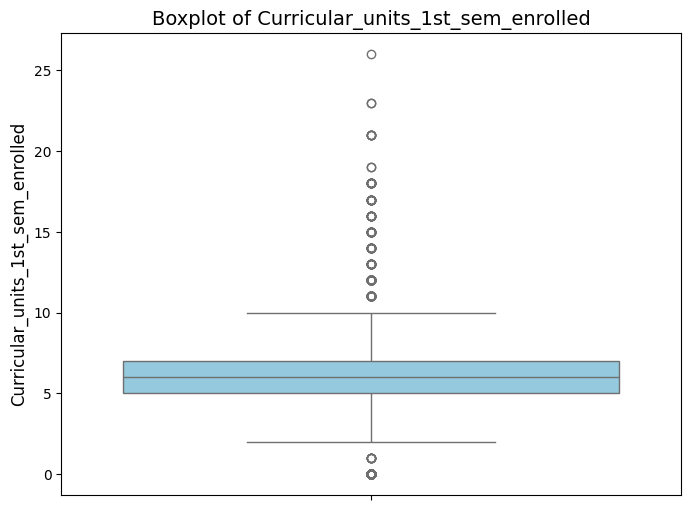

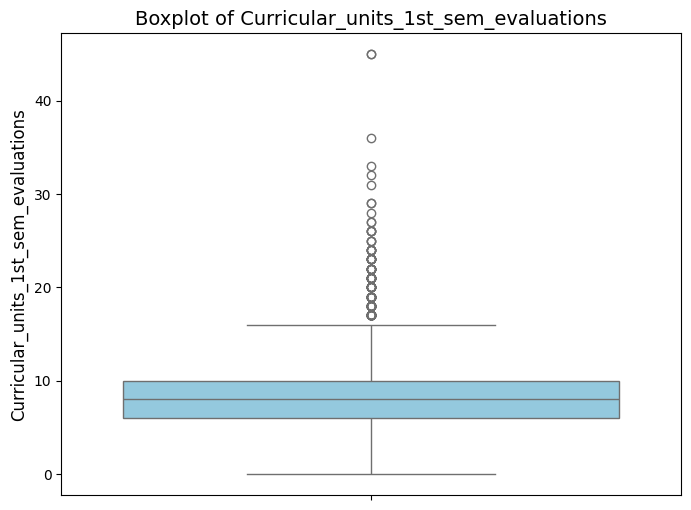

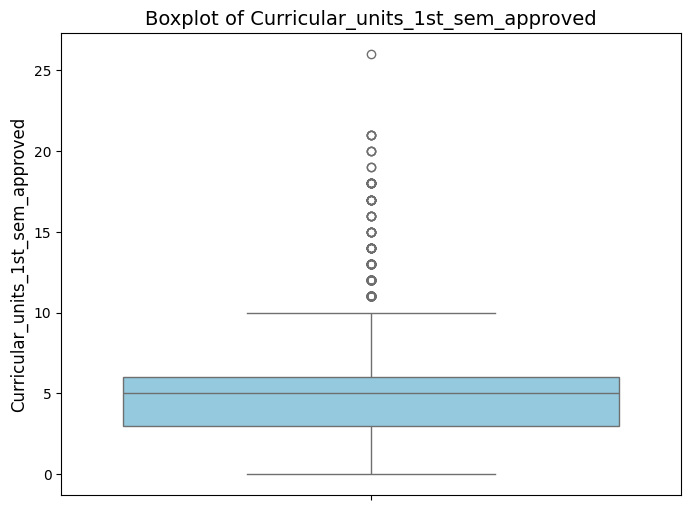

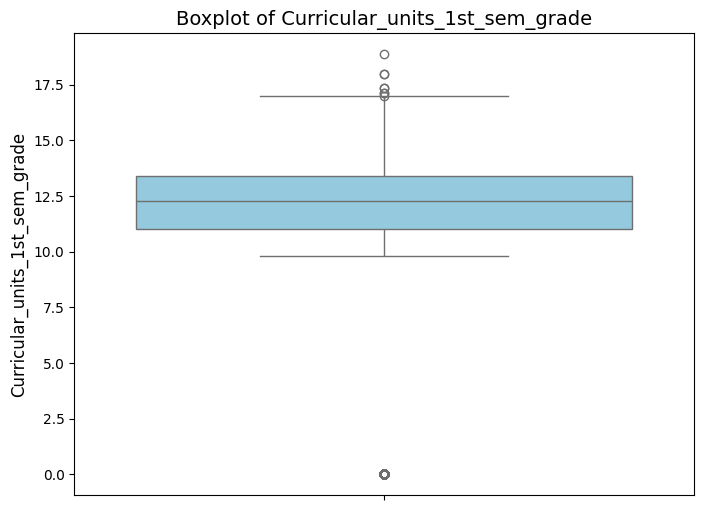

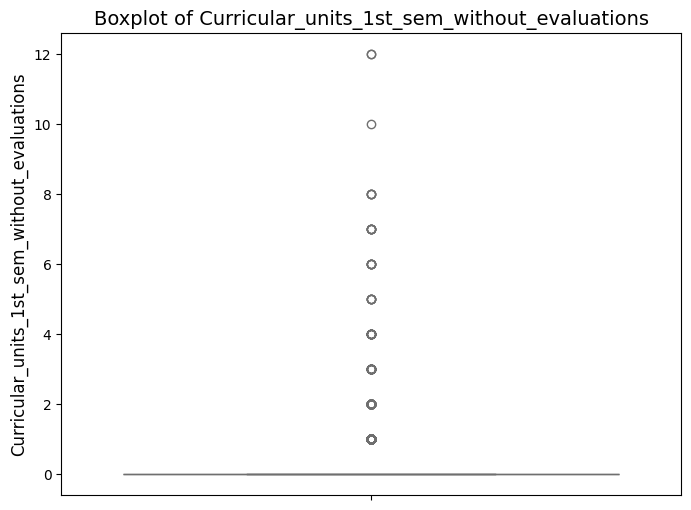

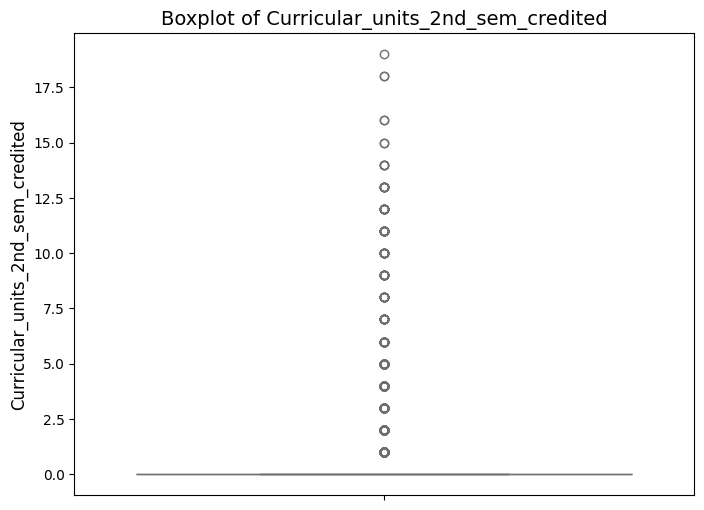

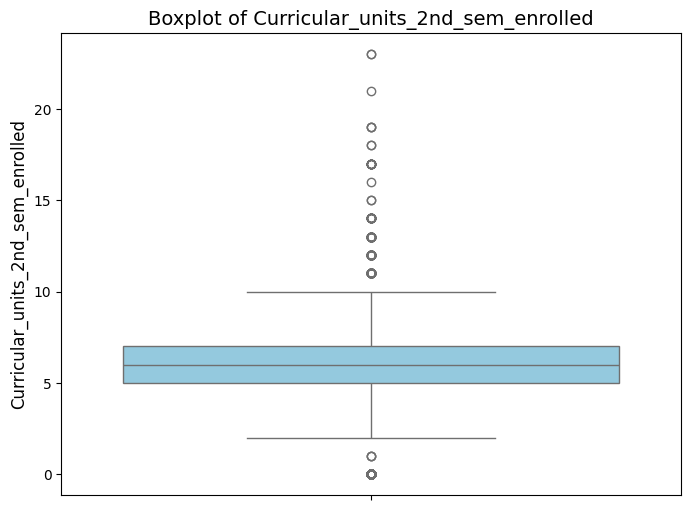

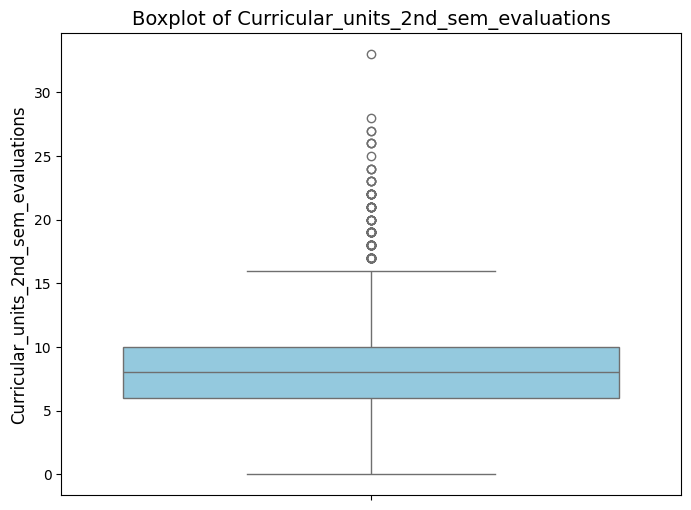

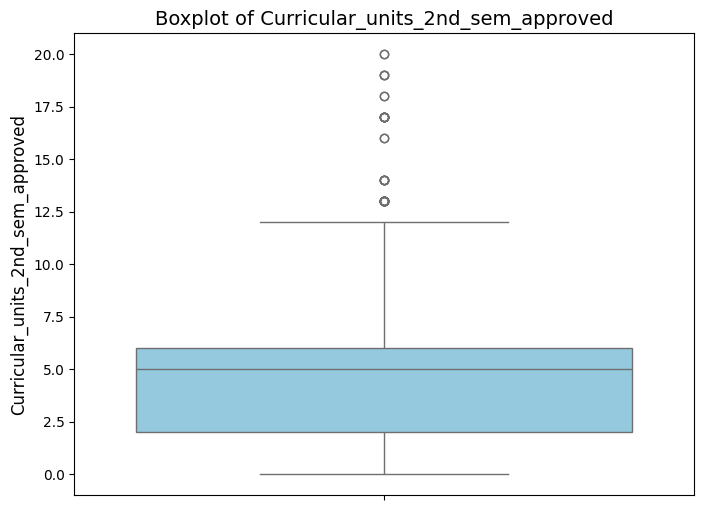

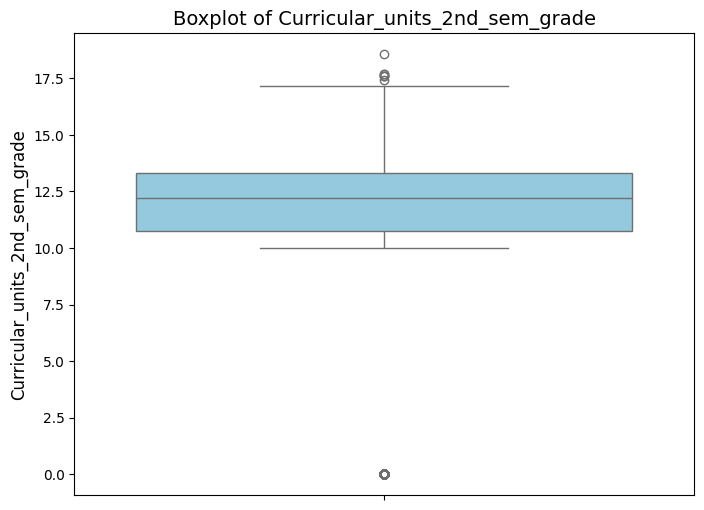

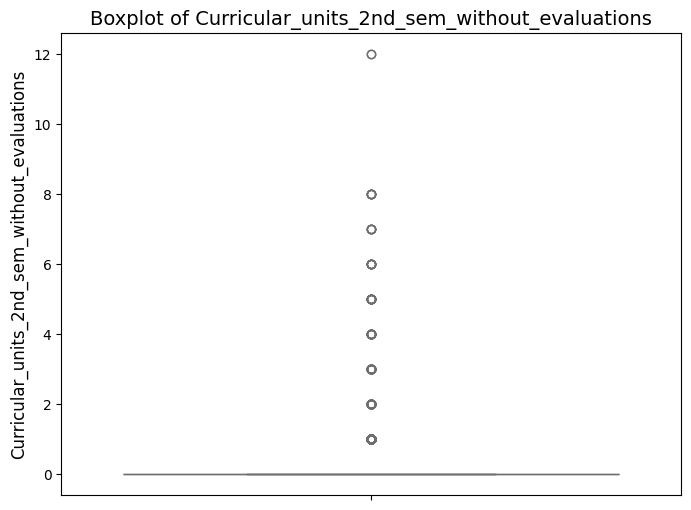

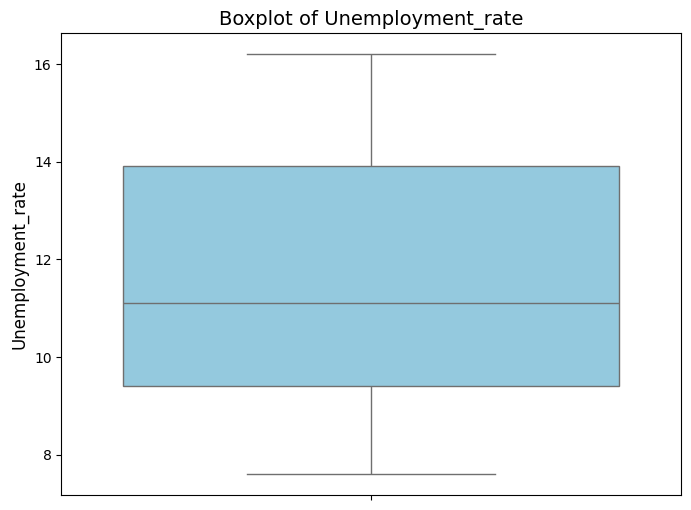

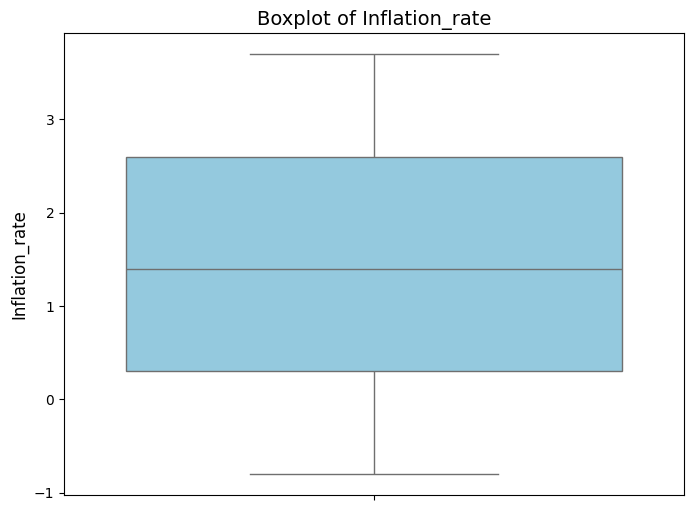

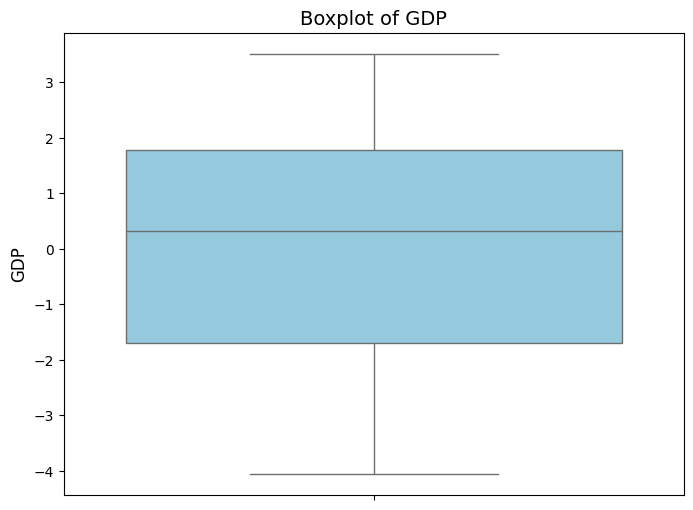

In [ ]:
# Daftar kolom numerik
numerical_cols = ['Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_credited',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_1st_sem_without_evaluations',
                  'Curricular_units_2nd_sem_credited',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
                  'Inflation_rate', 'GDP'] # Mendefinisikan list yang berisi nama-nama kolom numerik dalam dataset.

# Membuat boxplot satu per satu
for col in numerical_cols: # Melakukan iterasi untuk setiap kolom numerik dalam list numerical_cols.
    plt.figure(figsize=(8, 6))  # Membuat figure baru dengan ukuran 8x6 inci.
    sns.boxplot(data=dataset, y=col, color='skyblue')  # Membuat boxplot untuk kolom 'col' dengan data dari dataset dan warna skyblue.
    plt.title(f'Boxplot of {col}', fontsize=14)  # Menambahkan judul boxplot dengan nama kolom.
    plt.ylabel(col, fontsize=12)  # Menambahkan label sumbu y dengan nama kolom.
    plt.xlabel('')  # Mengosongkan label sumbu x.
    plt.show()  # Menampilkan boxplot yang telah dibuat.

In [ ]:
# Kolom yang akan dihapus.
columns_to_drop = ['Curricular_units_1st_sem_credited',
                   'Curricular_units_1st_sem_without_evaluations',
                   'Curricular_units_2nd_sem_credited',
                   'Curricular_units_2nd_sem_without_evaluations']

# Menghapus kolom dari dataset.
dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
# Kolom untuk penanganan outlier
columns_to_process = [
    'Admission_grade', 'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'
] # Menentukan kolom-kolom yang akan diproses untuk penanganan outlier.

# Definisikan transformer khusus untuk menangani outlier
class OutlierHandler(BaseEstimator, TransformerMixin):
    """
    Transformer khusus untuk menangani outlier dengan metode IQR.
    """
    def __init__(self, cols):
        """Inisialisasi OutlierHandler dengan daftar kolom yang akan diproses."""
        self.cols = cols
        self.lower_bounds = {} # Dictionary untuk menyimpan batas bawah outlier per kolom.
        self.upper_bounds = {} # Dictionary untuk menyimpan batas atas outlier per kolom.

    def fit(self, X, y=None):
        """Menghitung batas bawah dan atas outlier untuk setiap kolom."""
        for col in self.cols: # Iterasi melalui setiap kolom yang ditentukan.
            Q1 = X[col].quantile(0.25) # Menghitung kuartil pertama (Q1).
            Q3 = X[col].quantile(0.75) # Menghitung kuartil ketiga (Q3).
            IQR = Q3 - Q1 # Menghitung rentang interkuartil (IQR).
            self.lower_bounds[col] = Q1 - 1.5 * IQR # Menghitung batas bawah outlier.
            self.upper_bounds[col] = Q3 + 1.5 * IQR # Menghitung batas atas outlier.
        return self

    def transform(self, X):
        """Memotong nilai-nilai outlier agar berada dalam batas yang ditentukan."""
        X = X.copy() # Membuat salinan DataFrame untuk menghindari modifikasi data asli.
        for col in self.cols: # Iterasi melalui setiap kolom yang ditentukan.
            lower = self.lower_bounds[col] # Mengambil batas bawah outlier untuk kolom tersebut.
            upper = self.upper_bounds[col] # Mengambil batas atas outlier untuk kolom tersebut.
            X[col] = np.clip(X[col], lower, upper)  # Mengatasi outlier dengan memotong nilai di luar batas.
        return X

# Buat pipeline
pipeline = Pipeline(steps=[
    ('outlier_handler', OutlierHandler(cols=columns_to_process))
]) # Membuat pipeline dengan OutlierHandler sebagai salah satu tahapannya.

# Fit dan transform dataset
dataset = pipeline.fit_transform(dataset) # Menyesuaikan pipeline dengan data dan mentransformasikan dataset.

# Simpan pipeline ke file
joblib.dump(pipeline, 'outlier_handler_pipeline.joblib') # Menyimpan pipeline ke file untuk penggunaan selanjutnya.

['outlier_handler_pipeline.joblib']

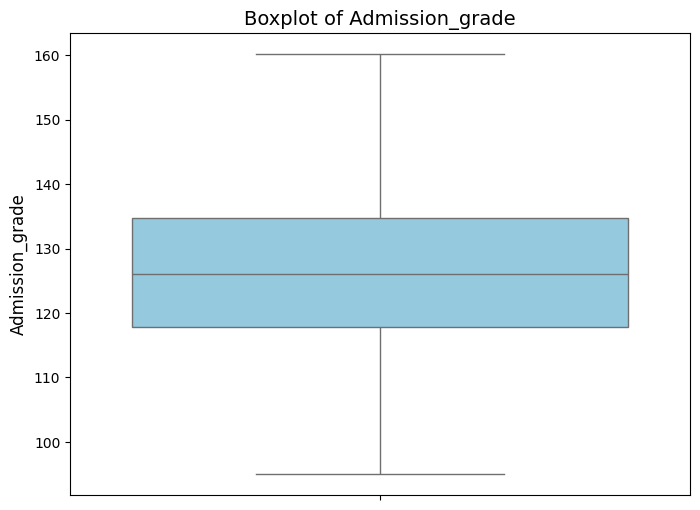

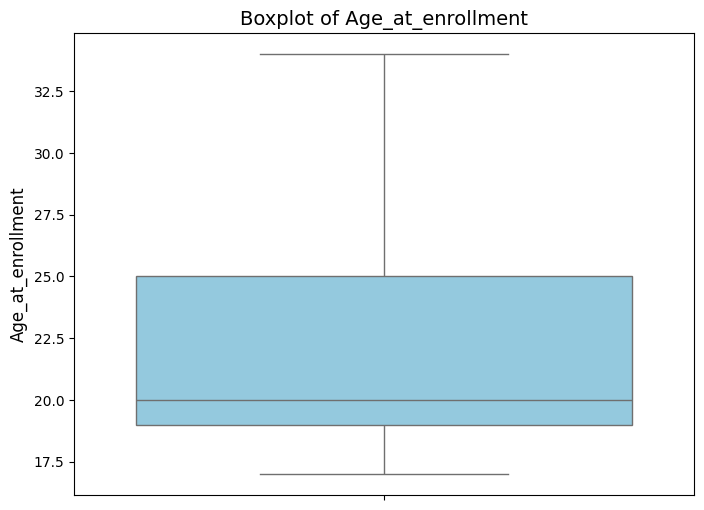

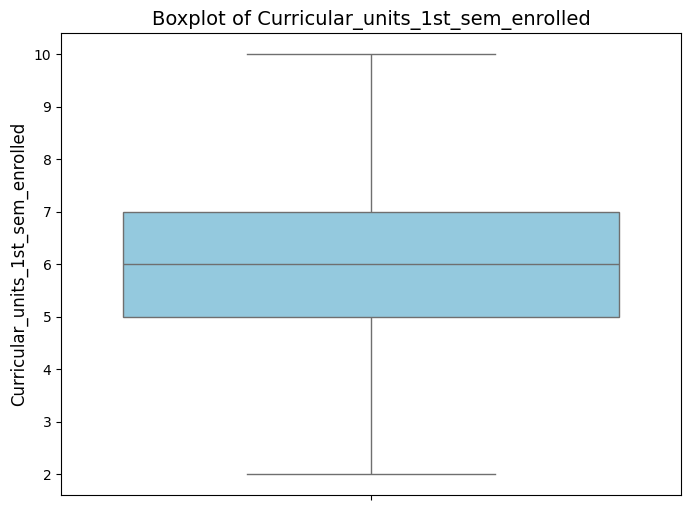

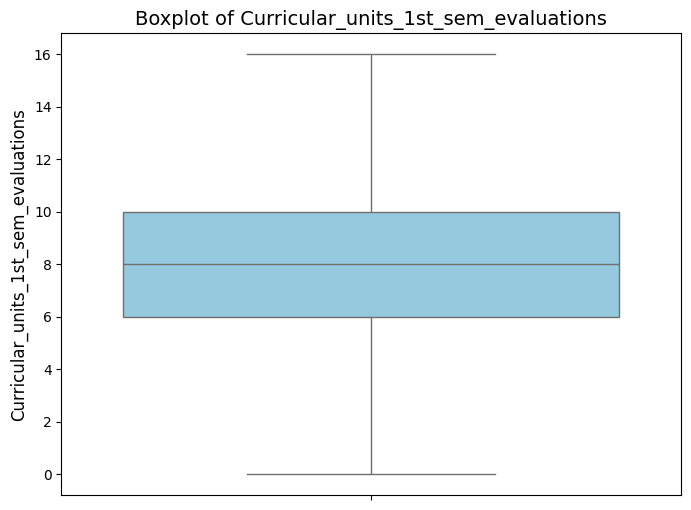

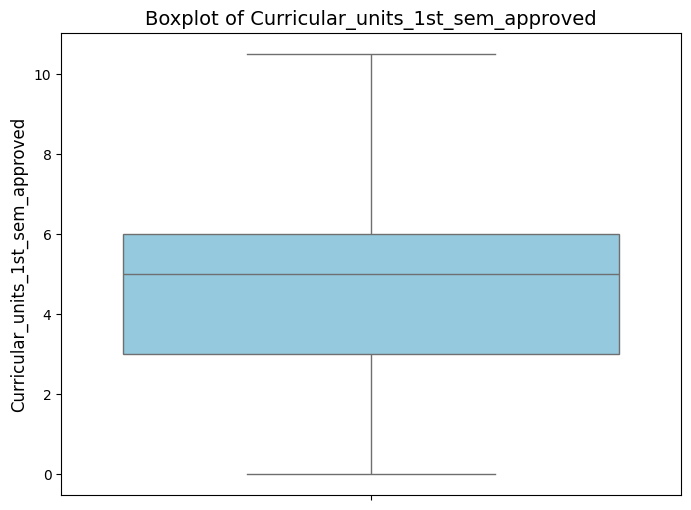

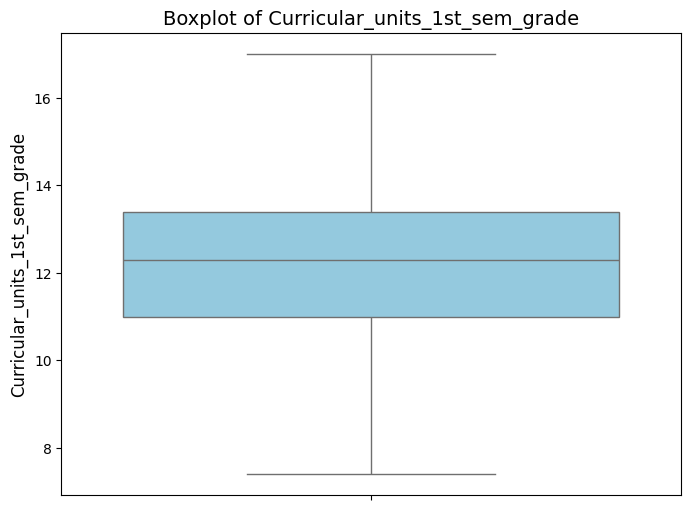

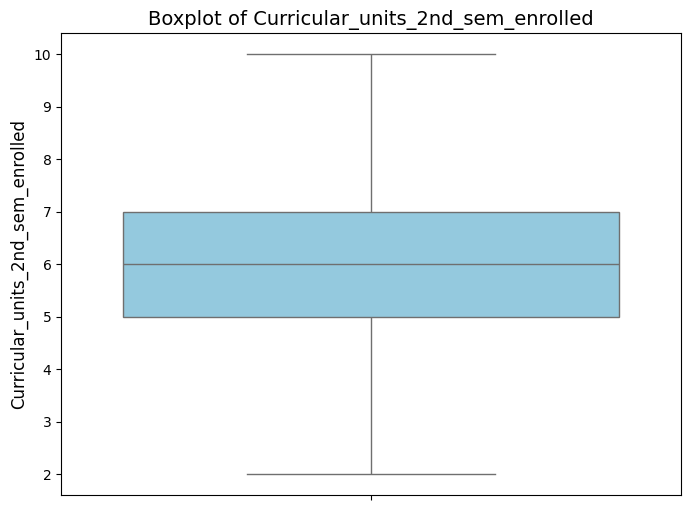

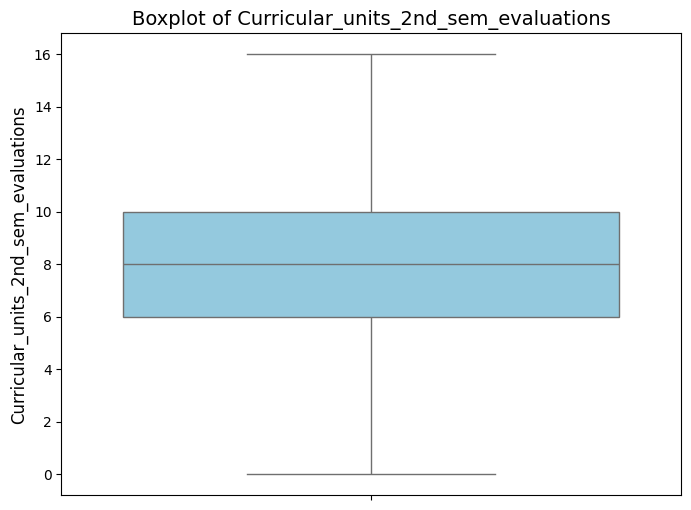

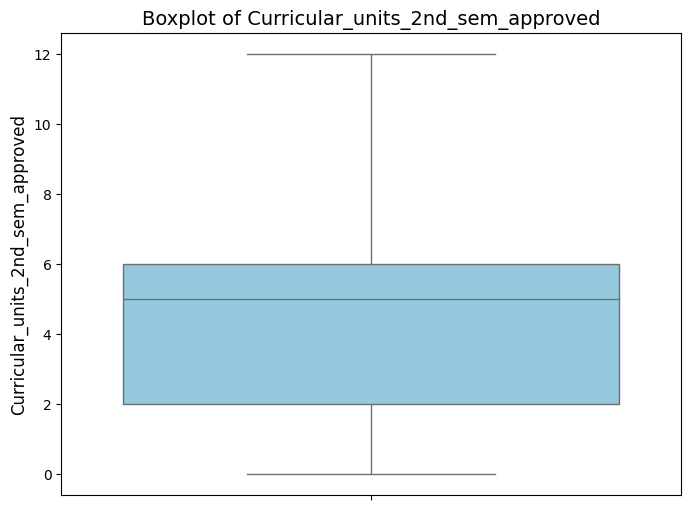

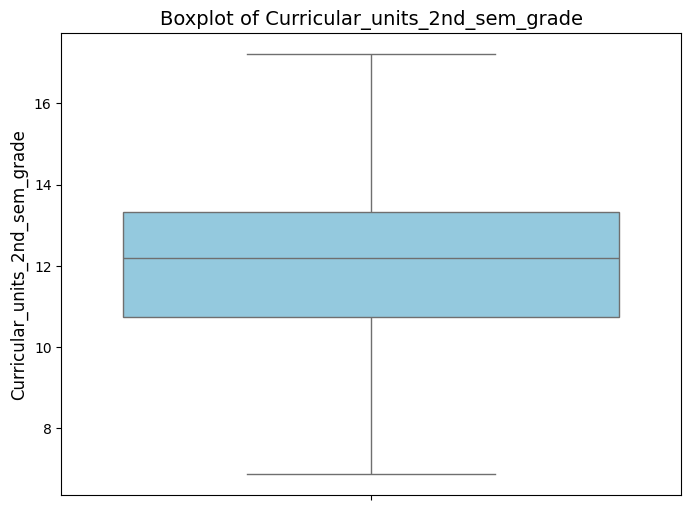

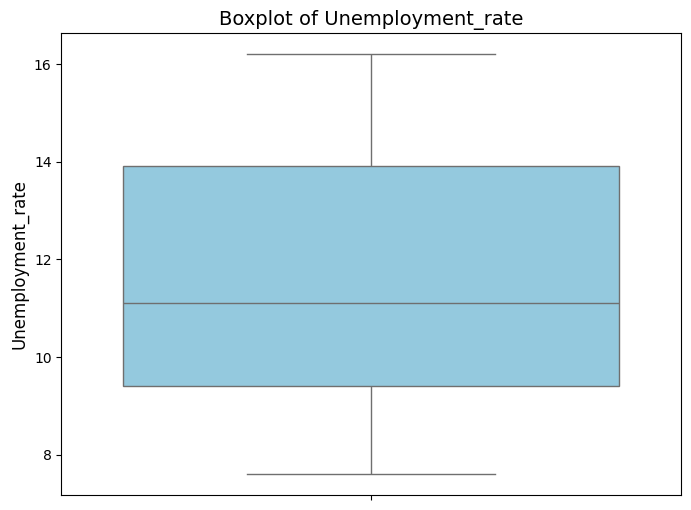

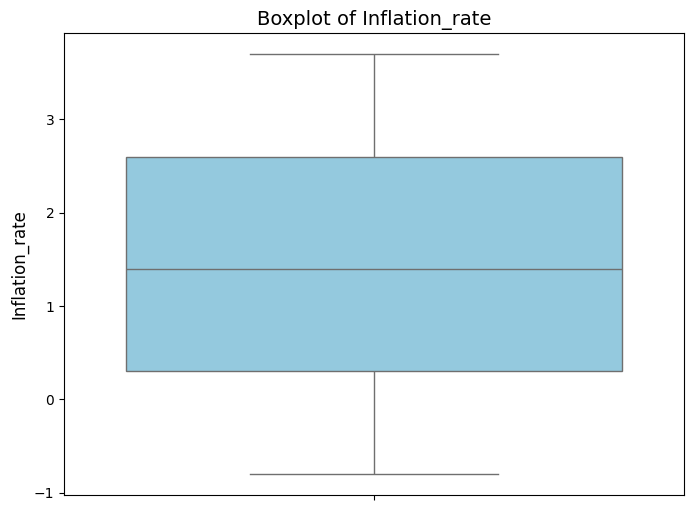

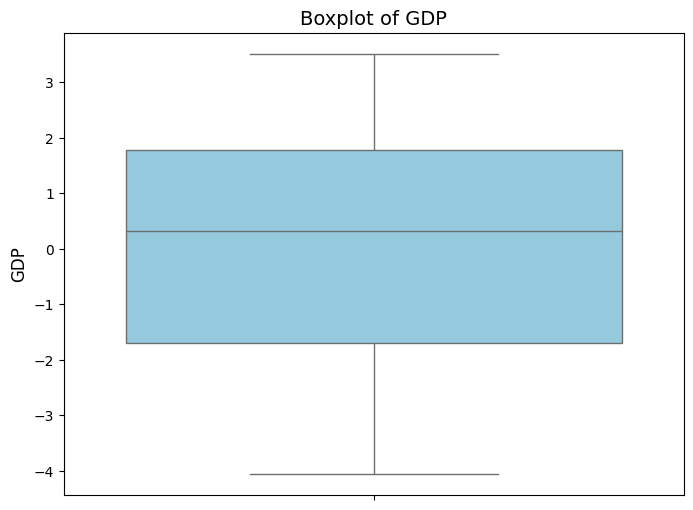

In [ ]:
# Daftar kolom numerik
numerical_cols = ['Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP'] # Mendefinisikan list yang berisi nama-nama kolom numerik dalam dataset.

# Membuat boxplot satu per satu
for col in numerical_cols: # Melakukan iterasi untuk setiap kolom numerik dalam list numerical_cols.
    plt.figure(figsize=(8, 6))  # Ukuran figure
    sns.boxplot(data=dataset, y=col, color='skyblue')  # Boxplot untuk kolom tertentu
    plt.title(f'Boxplot of {col}', fontsize=14)  # Judul
    plt.ylabel(col, fontsize=12)  # Label y
    plt.xlabel('')  # Menghilangkan label x
    plt.show()  # Menampilkan plot sebelum lanjut ke kolom berikutnya

In [ ]:
# Menampilkan informasi ringkas tentang DataFrame setelah perubahan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Marital_status                        4424 non-null   category
 1   Application_mode                      4424 non-null   category
 2   Application_order                     4424 non-null   category
 3   Course                                4424 non-null   category
 4   Daytime_evening_attendance            4424 non-null   category
 5   Previous_qualification                4424 non-null   category
 6   Previous_qualification_grade          4424 non-null   category
 7   Nacionality                           4424 non-null   category
 8   Mothers_qualification                 4424 non-null   category
 9   Fathers_qualification                 4419 non-null   category
 10  Mothers_occupation                    4424 non-null   category
 11  Fath

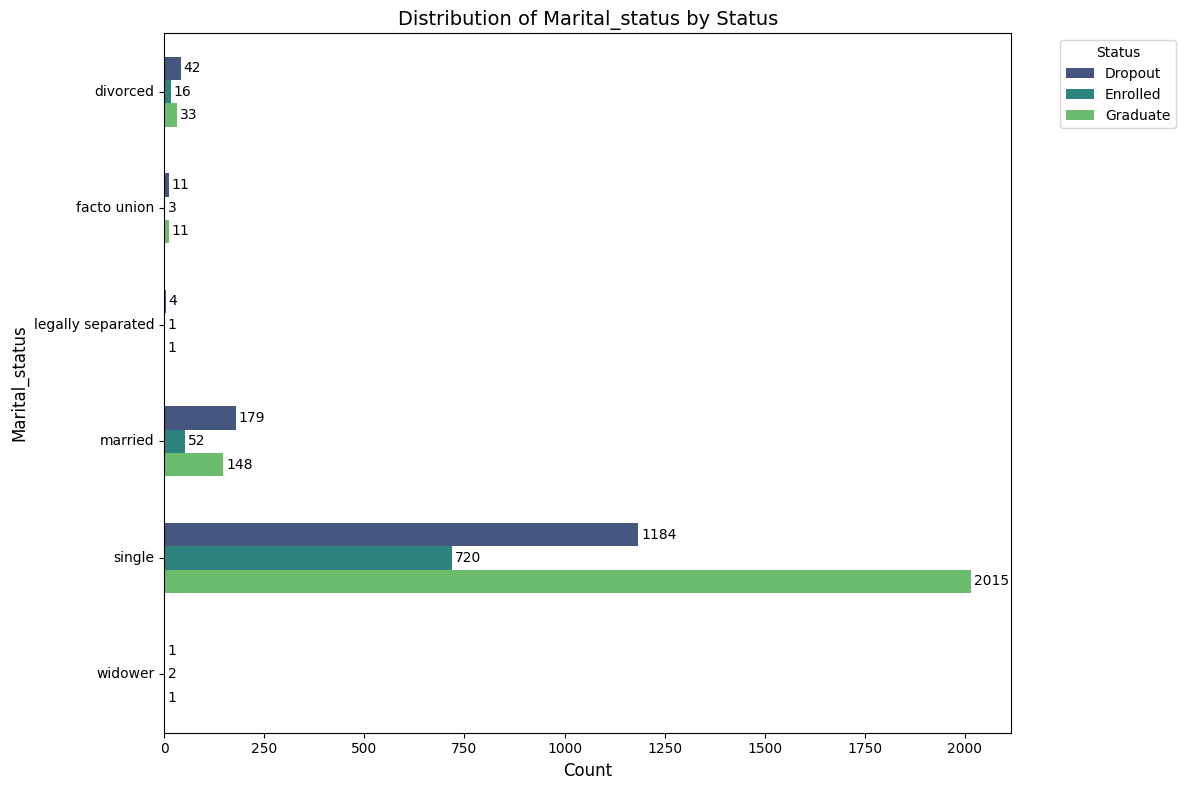

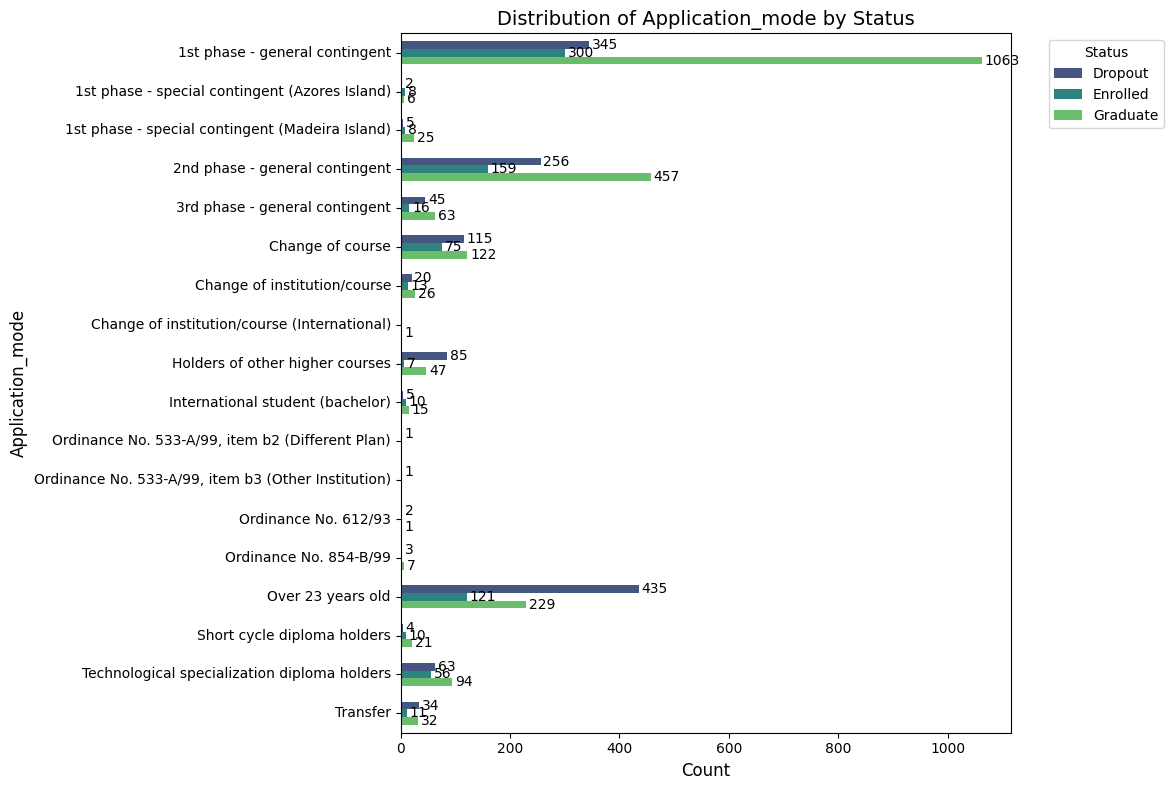

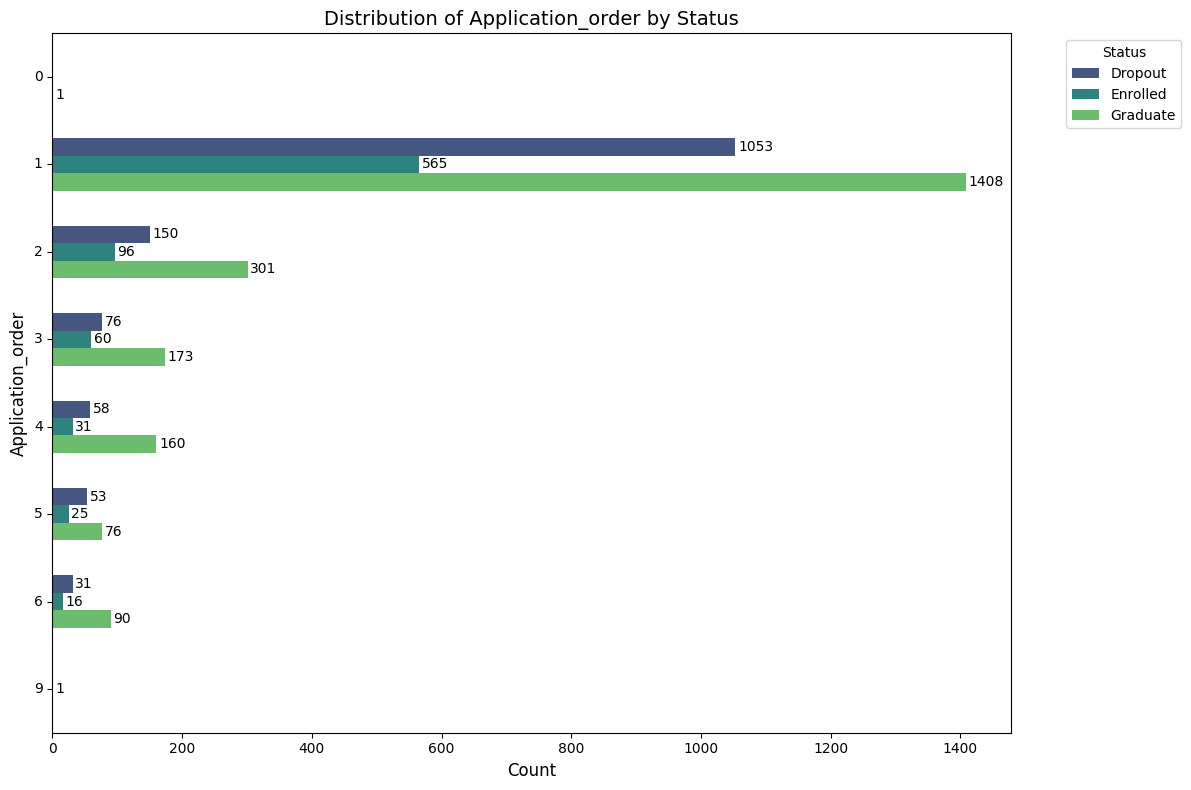

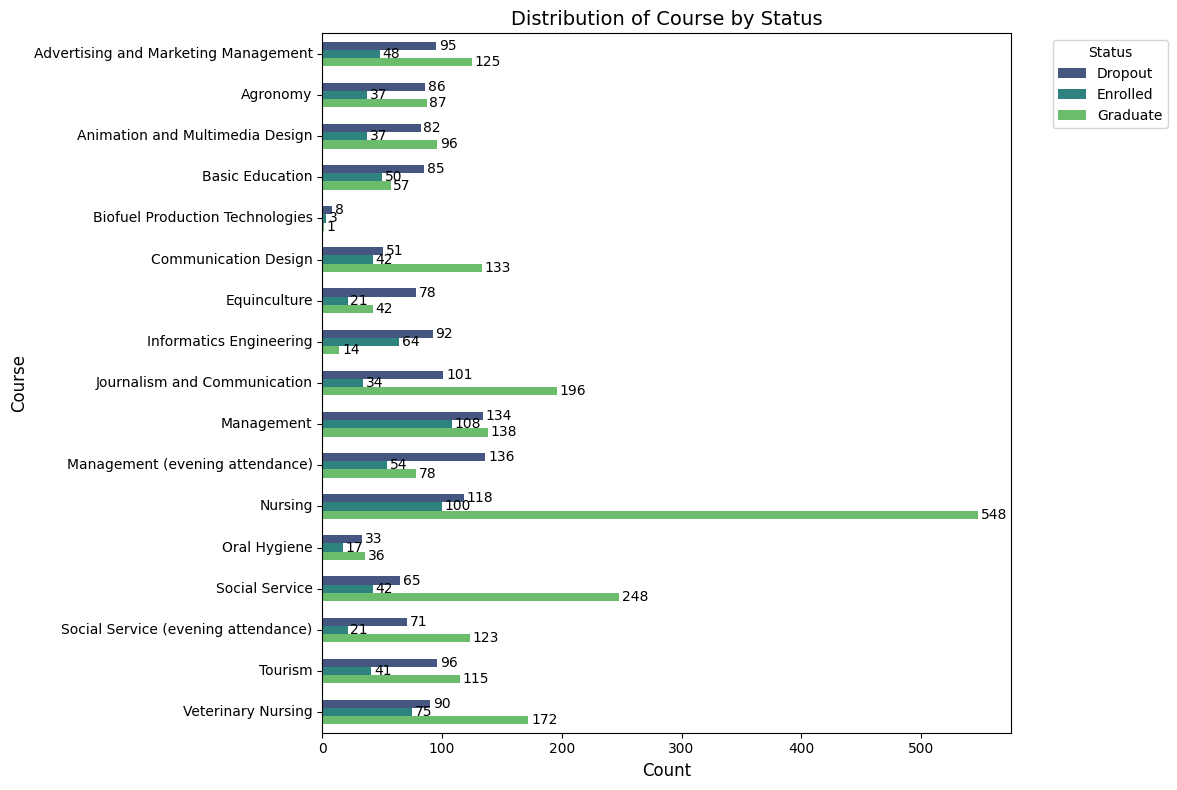

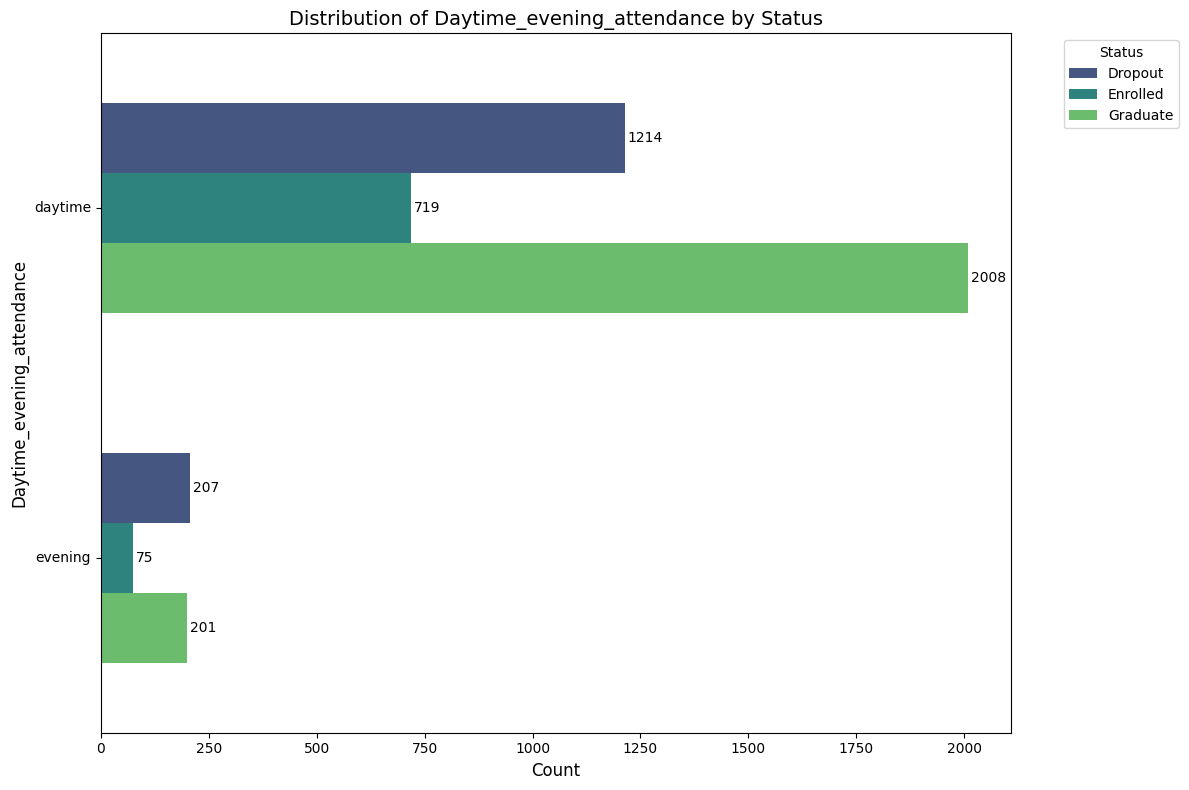

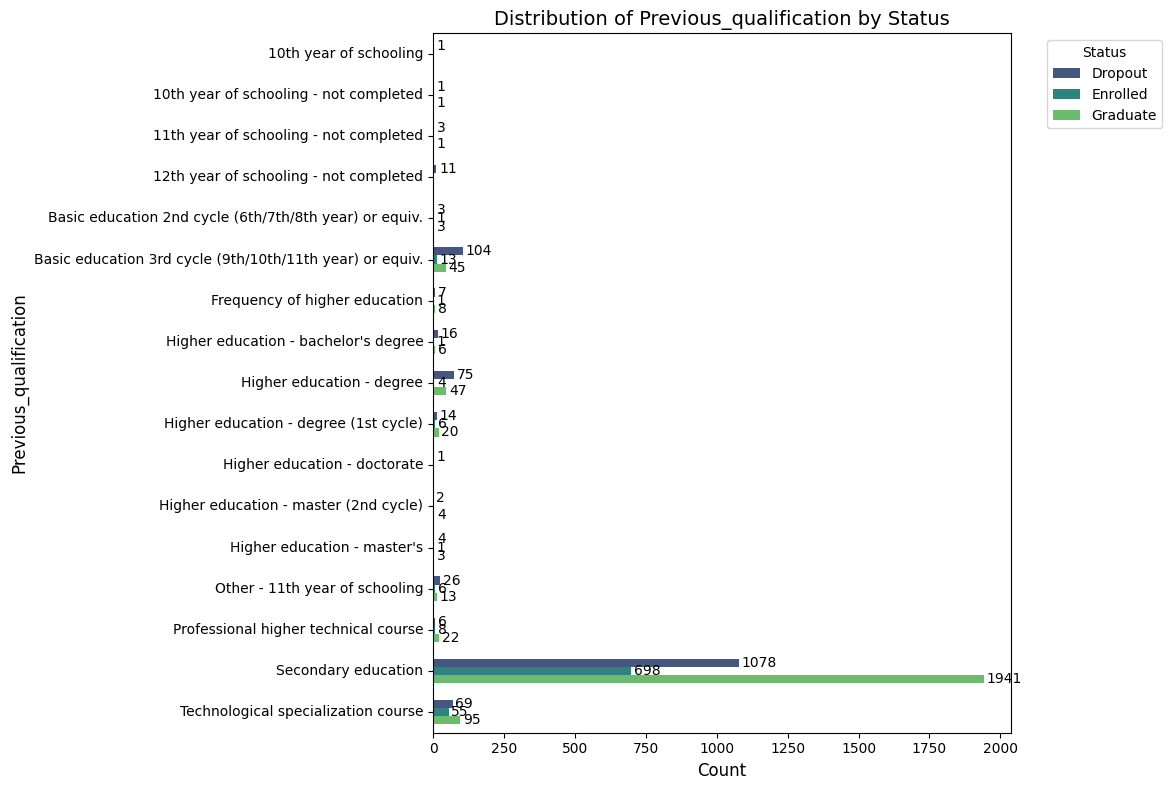

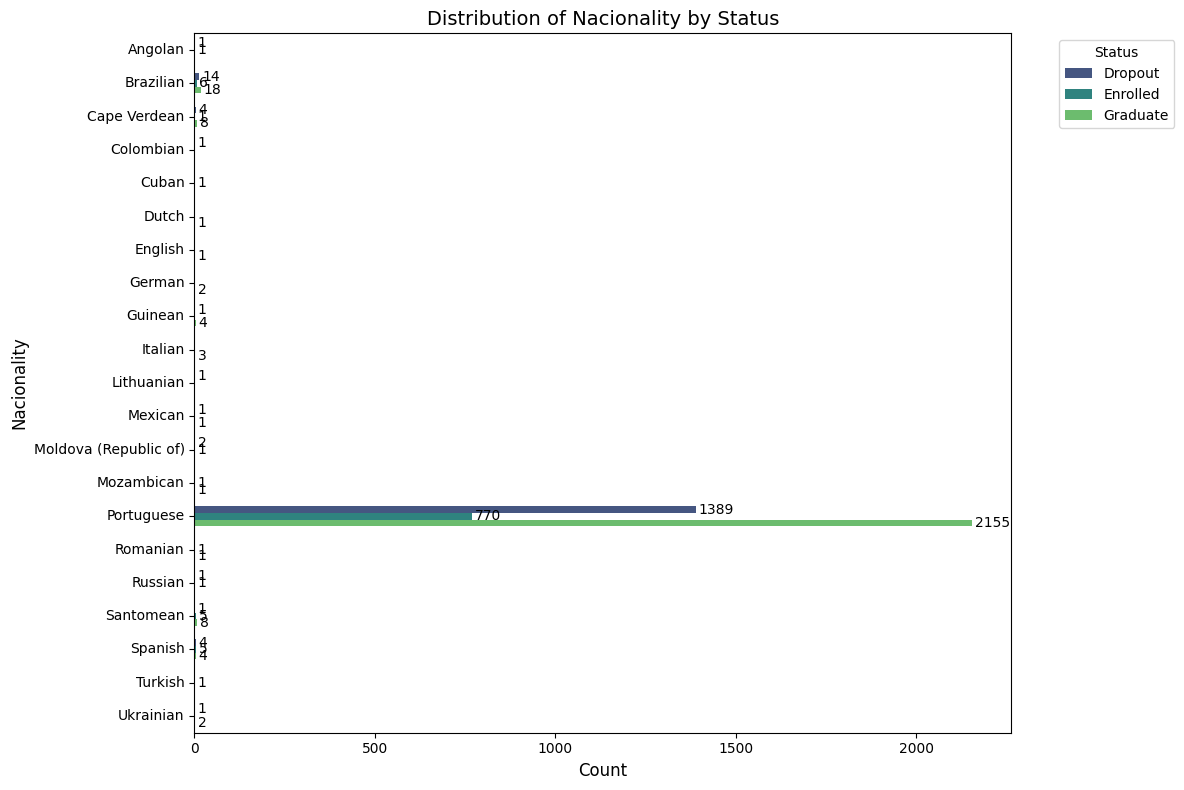

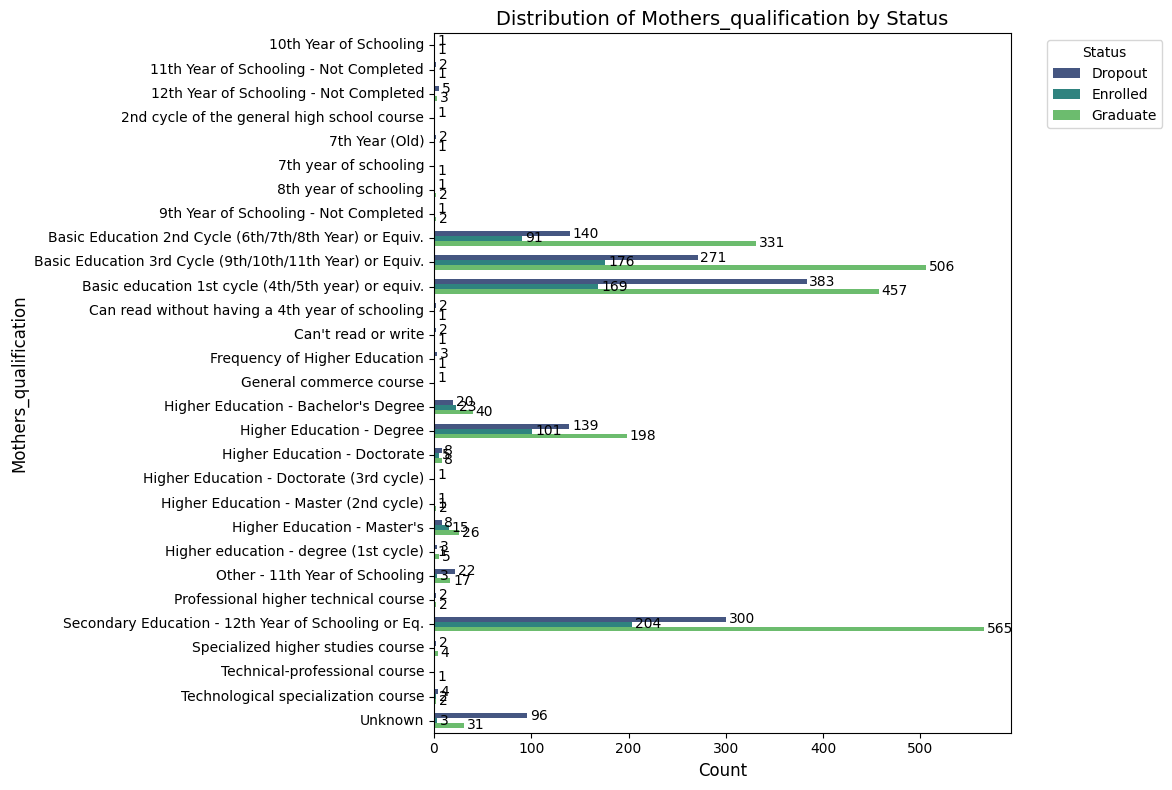

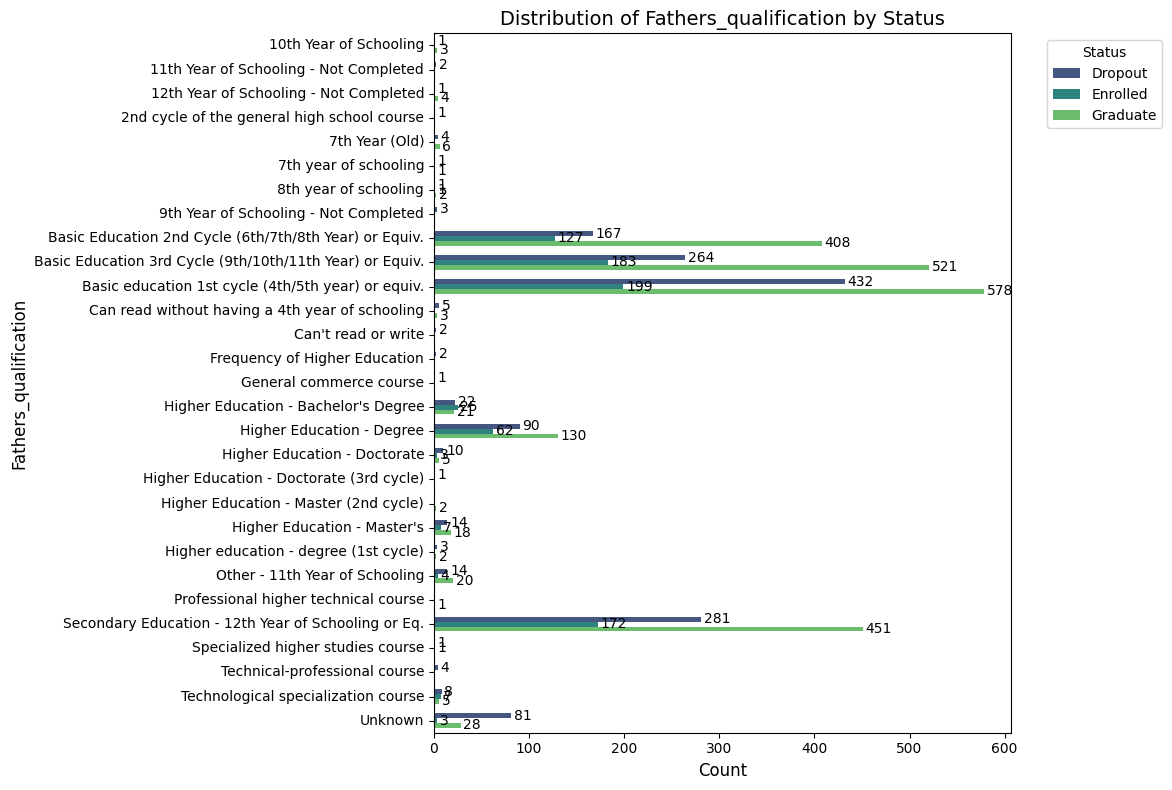

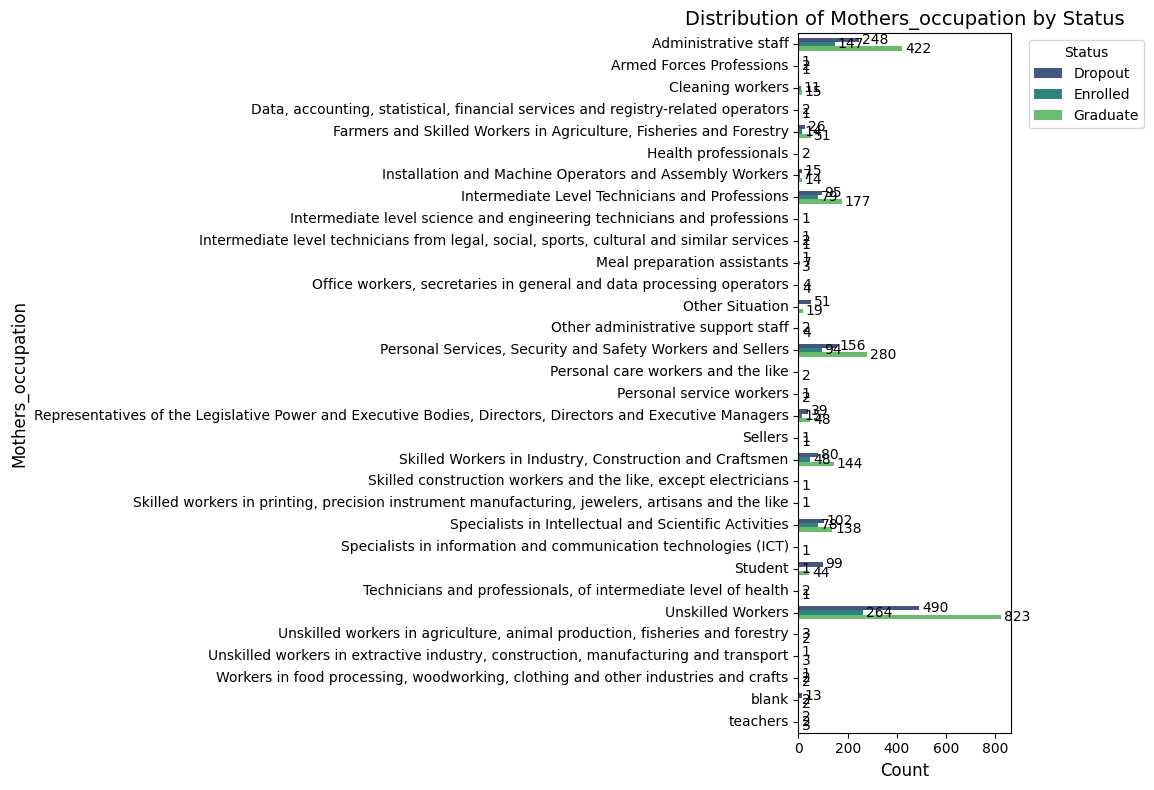

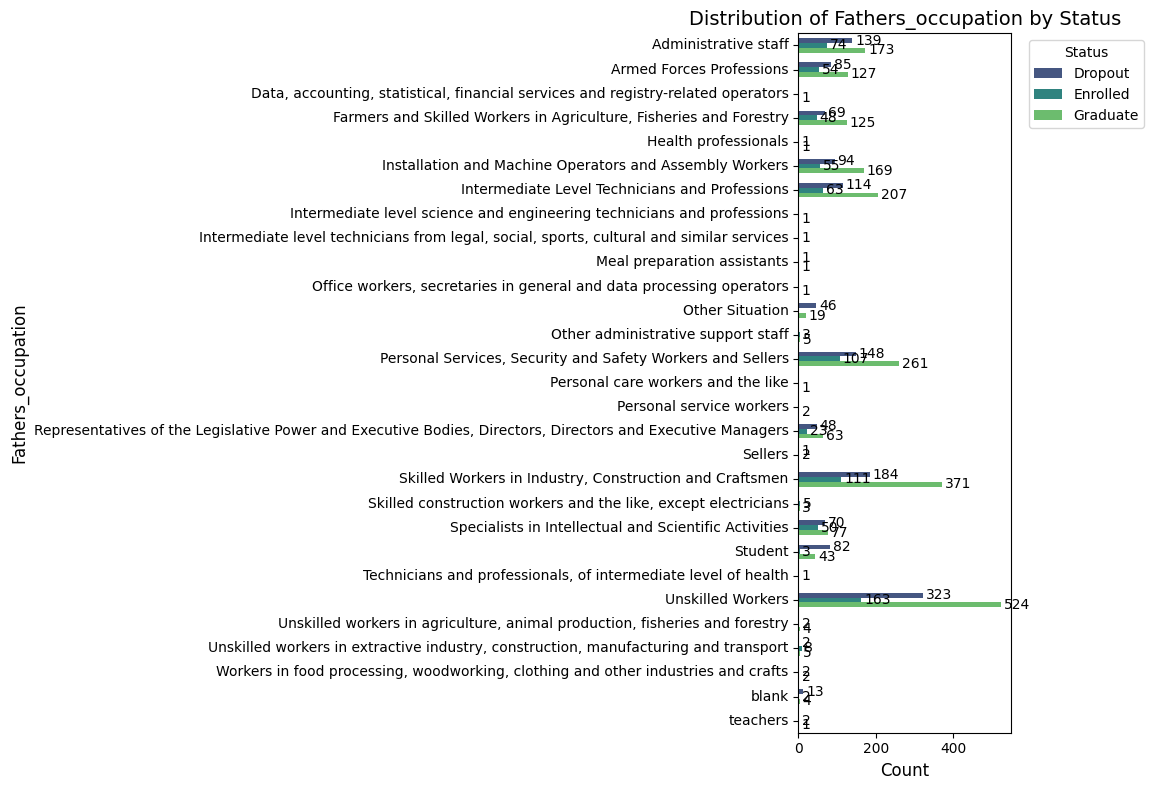

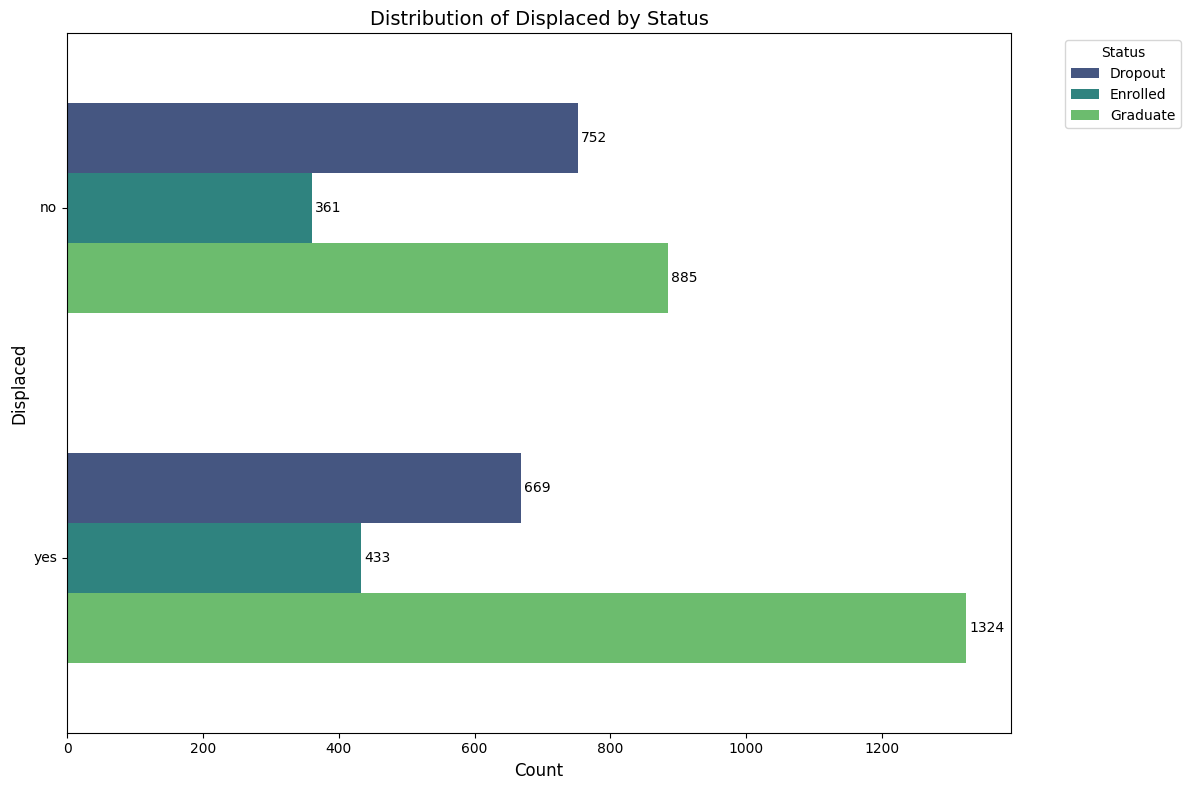

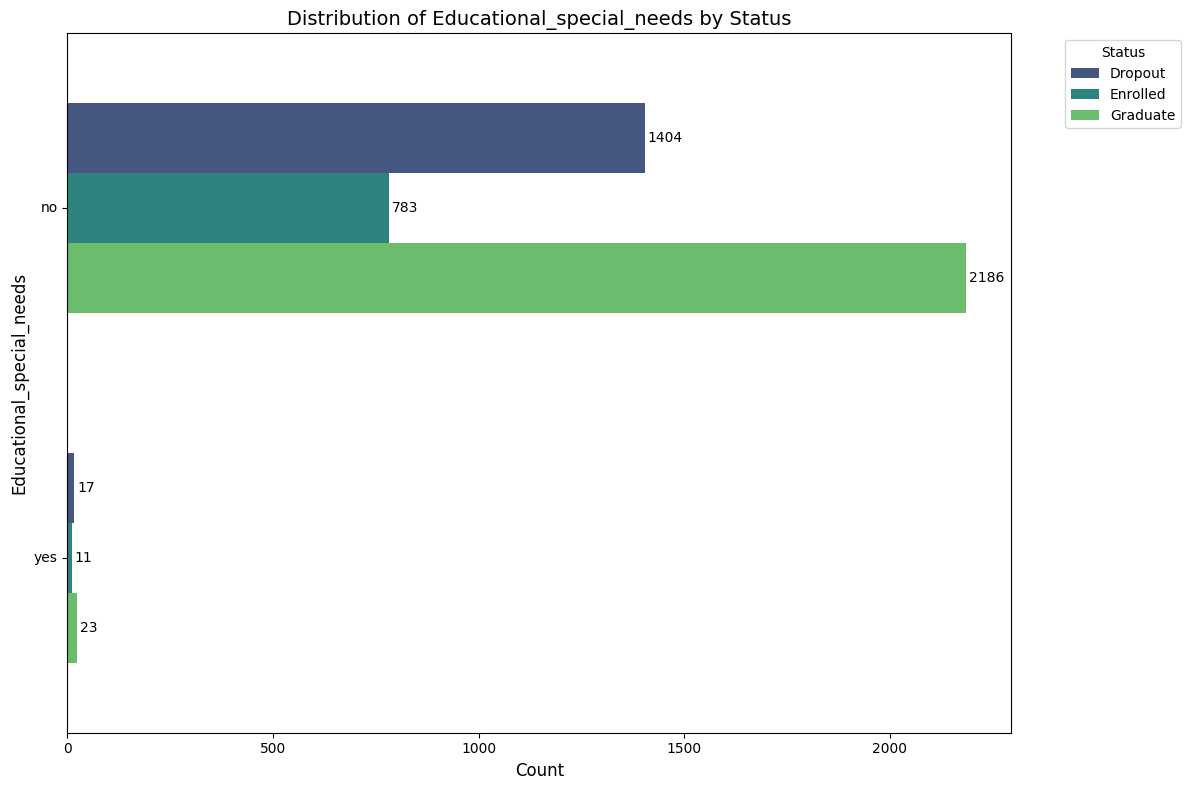

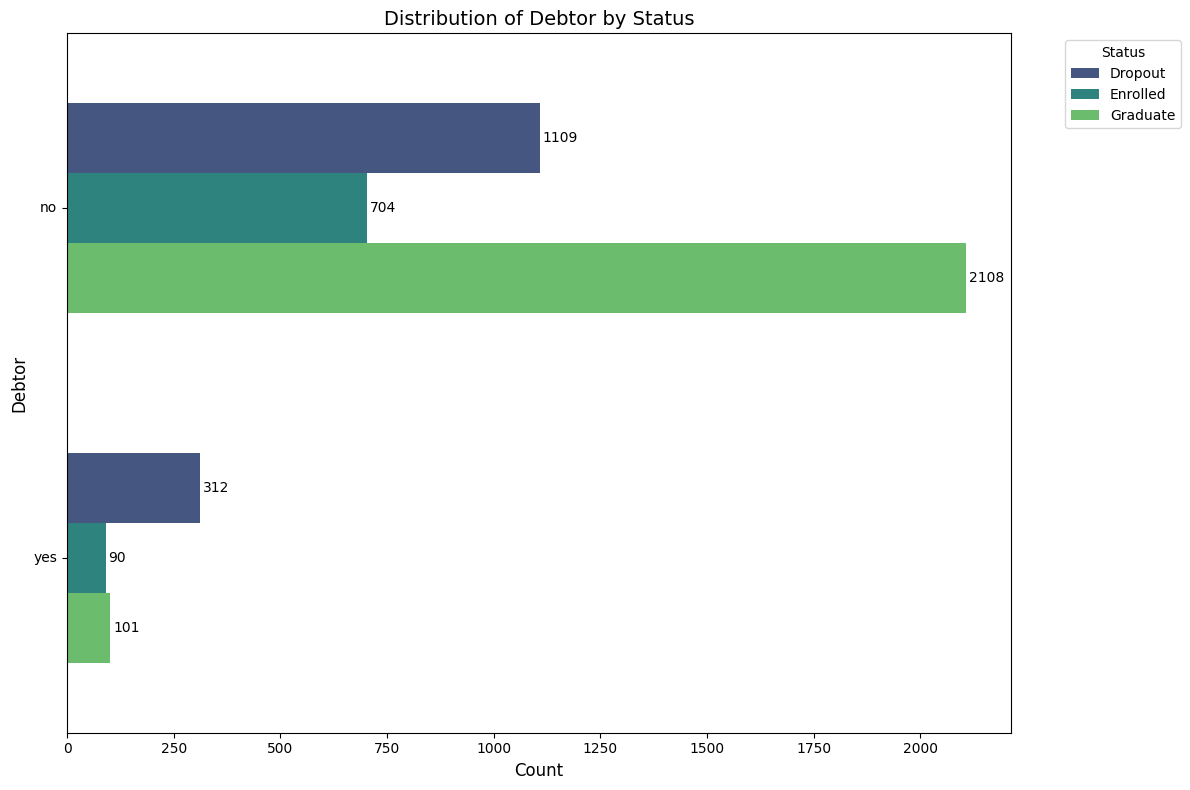

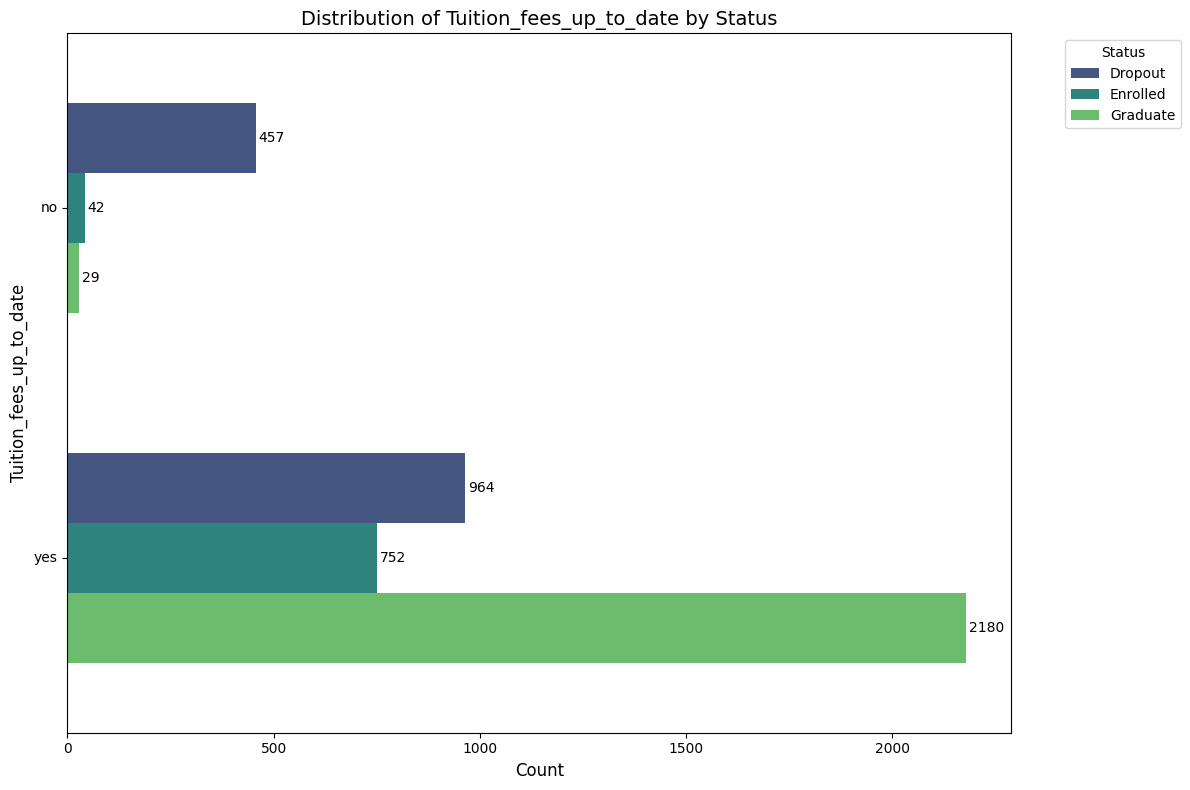

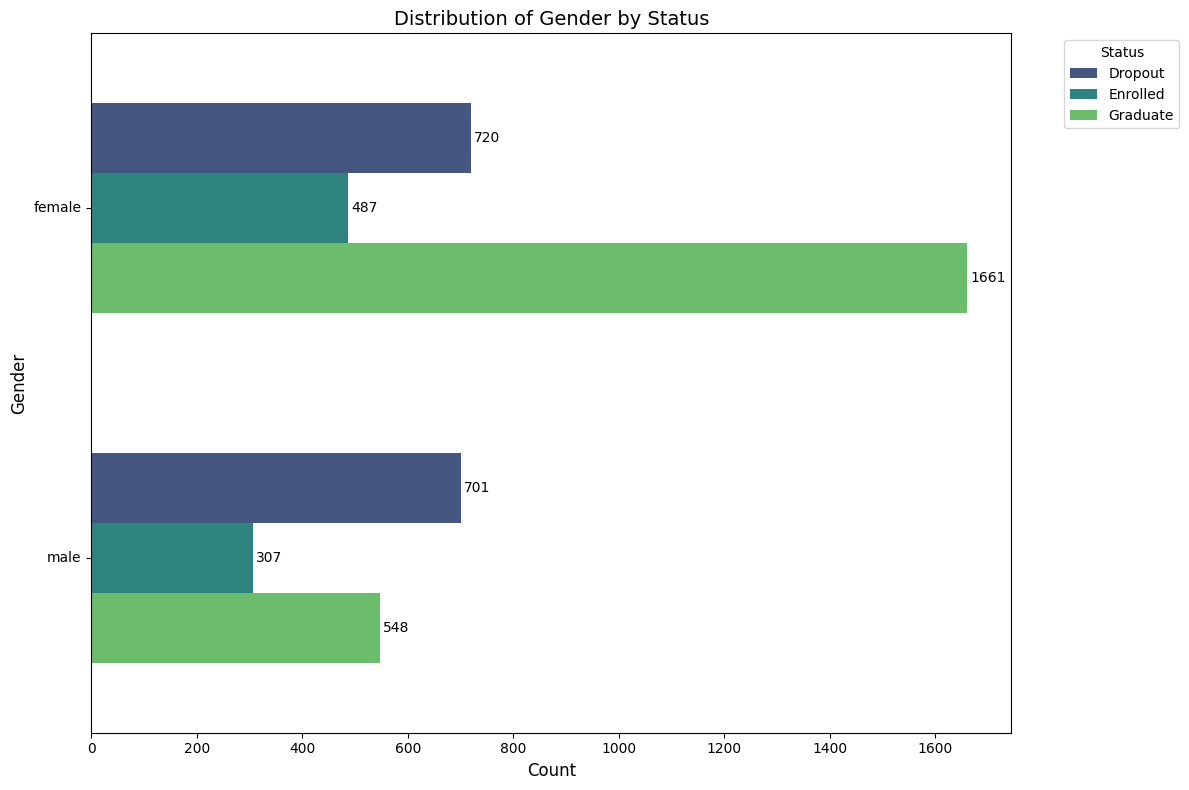

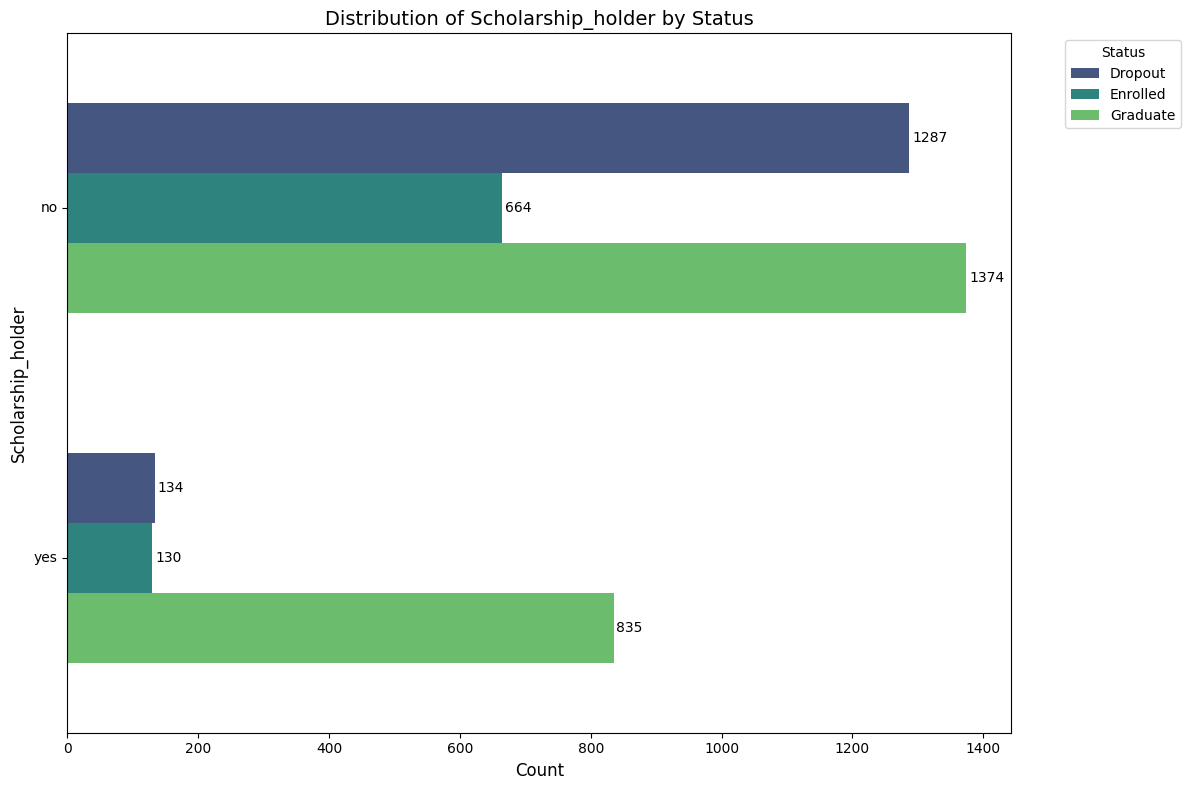

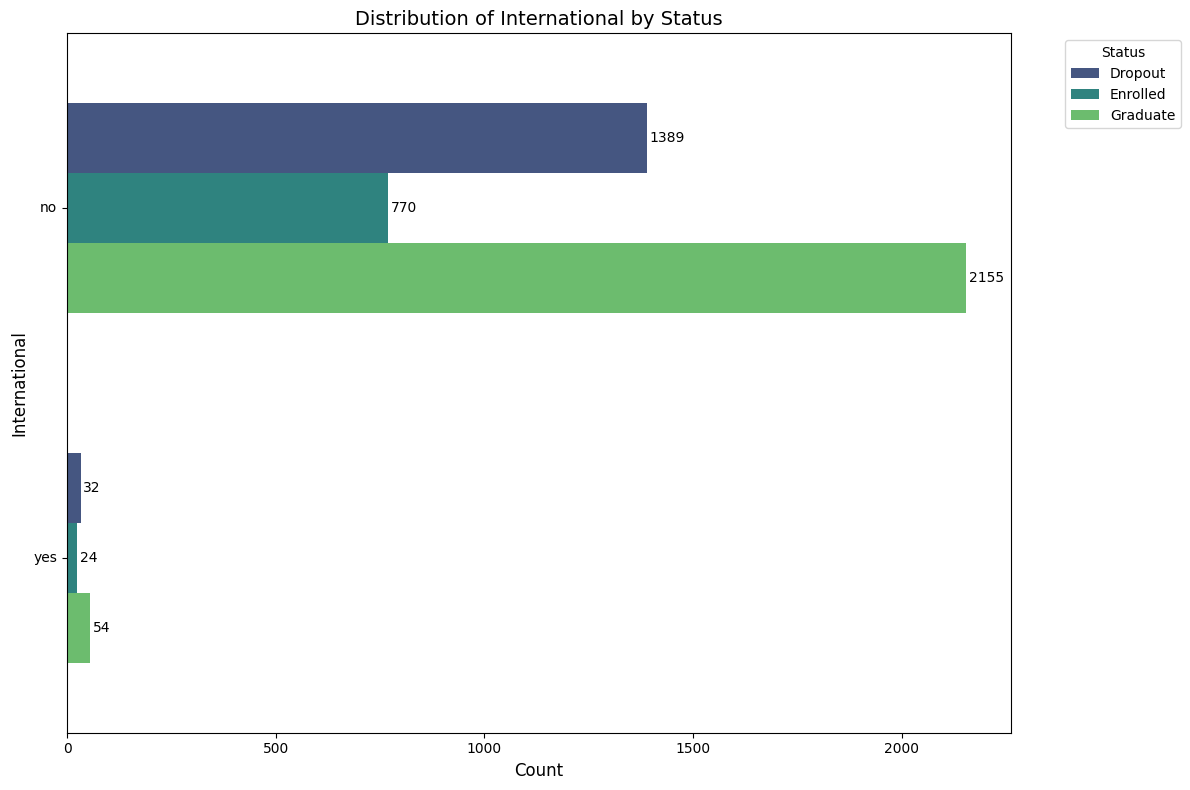

In [ ]:
# Daftar kolom kategori
category_cols = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
] # Mendefinisikan list yang berisi nama-nama kolom kategori dalam dataset.

# Menampilkan plot horizontal bar chart satu per satu
for col in category_cols: # Melakukan iterasi untuk setiap kolom kategori dalam list category_cols.
    plt.figure(figsize=(12, 8))  # Membuat figure baru dengan ukuran 12x8 inci untuk setiap bar chart.
    ax = sns.countplot(data=dataset, y=col, hue='Status', palette='viridis', dodge=True, width=0.6)  # Membuat bar chart horizontal dengan Seaborn, mengelompokkan data berdasarkan kolom 'Status' dan memberikan warna berbeda untuk setiap kelompok.
                                                                                                # Parameter dodge=True memisahkan bar untuk setiap kelompok, dan width=0.6 mengatur lebar bar.

    # Menambahkan jumlah pada setiap batang
    for container in ax.containers: # Melakukan iterasi untuk setiap container (kelompok bar) dalam bar chart.
        ax.bar_label(container, label_type='edge', fontsize=10, padding=2)  # Menambahkan label jumlah pada setiap batang bar, menempatkan label di tepi batang dengan ukuran font 10 dan jarak 2 dari batang.

    # Menyesuaikan jarak antar kategori dengan mengatur jarak antar ticks
    ax.set_yticks(ax.get_yticks())  # Mengambil ticks default pada sumbu y.
    ax.set_yticklabels(ax.get_yticklabels(), va='center')  # Mengatur label kategori agar tetap sejajar di tengah tick pada sumbu y.

    # Menambahkan judul dan label
    plt.title(f'Distribution of {col} by Status', fontsize=14)  # Menambahkan judul bar chart dengan nama kolom dan status.
    plt.xlabel('Count', fontsize=12)  # Menambahkan label sumbu x dengan teks 'Count' dan ukuran font 12.
    plt.ylabel(col, fontsize=12)  # Menambahkan label sumbu y dengan nama kolom dan ukuran font 12.
    plt.legend(title='Status', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')  # Menambahkan legenda dengan judul 'Status', ukuran font 10, dan ditempatkan di luar area plot di pojok kanan atas.
    plt.tight_layout()  # Mengatur layout agar elemen-elemen plot tidak tumpang tindih.

    plt.show() # Menampilkan bar chart yang telah dibuat.

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


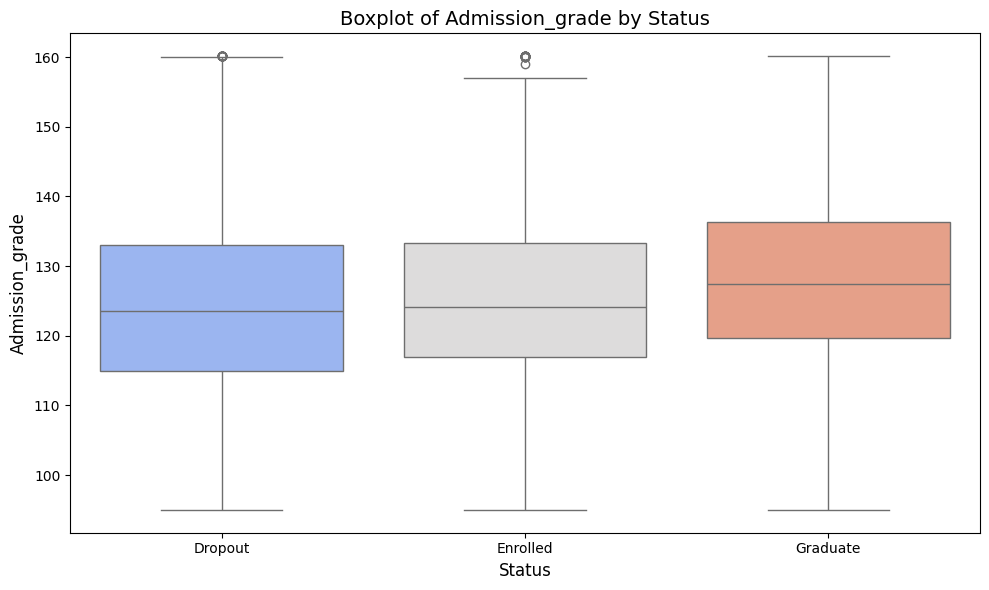

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


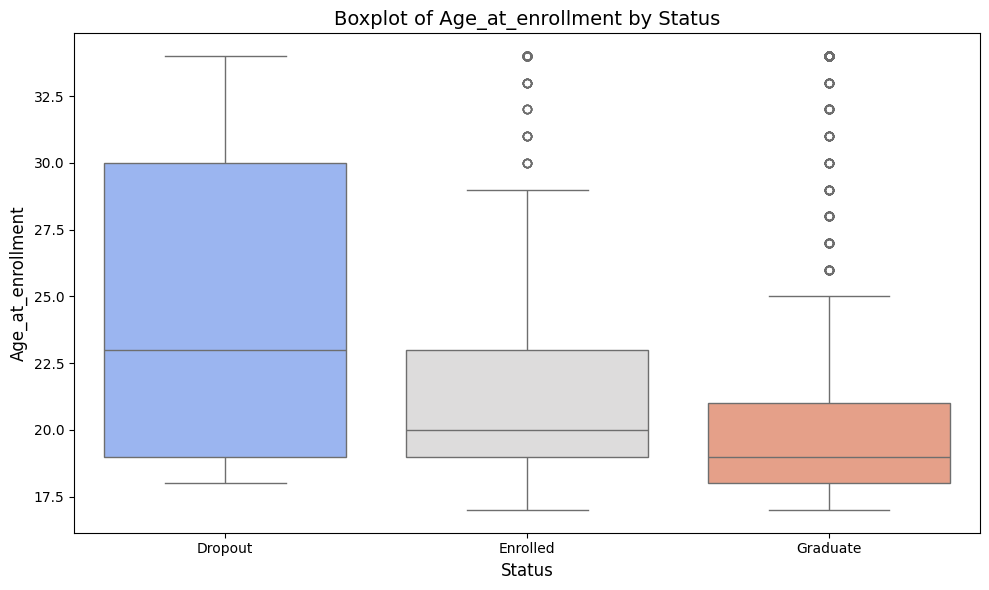

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


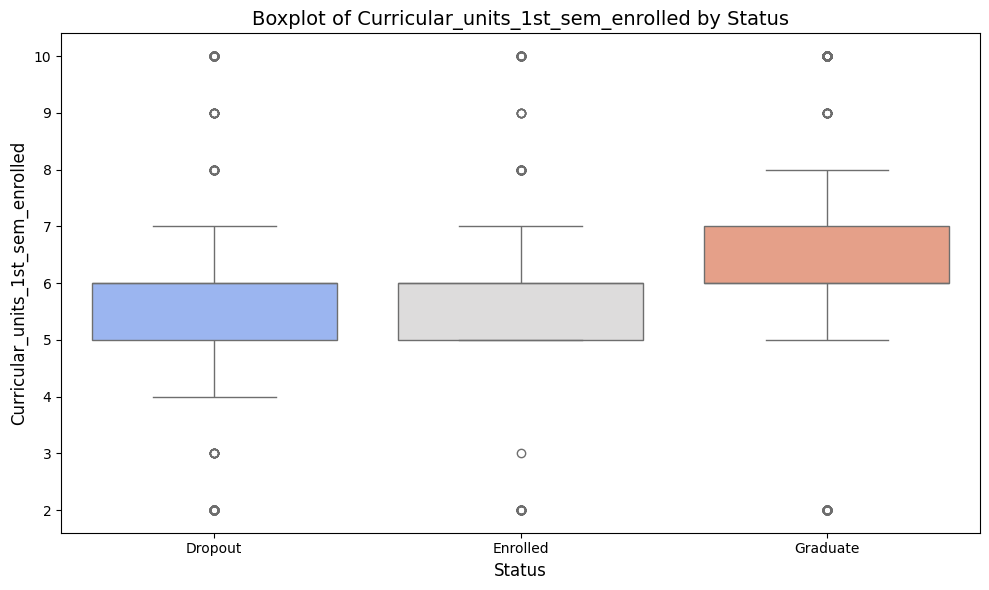

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


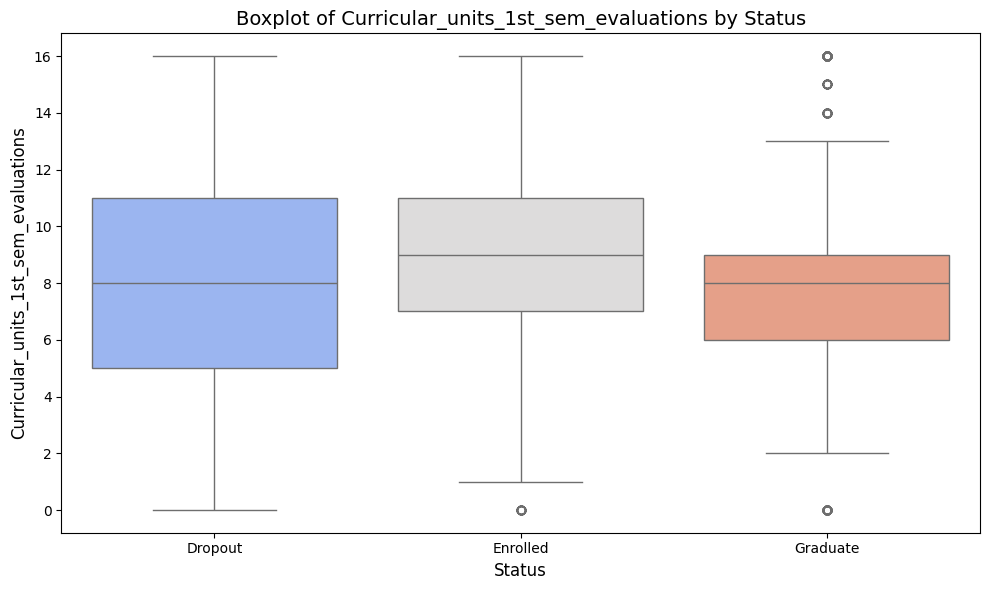

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


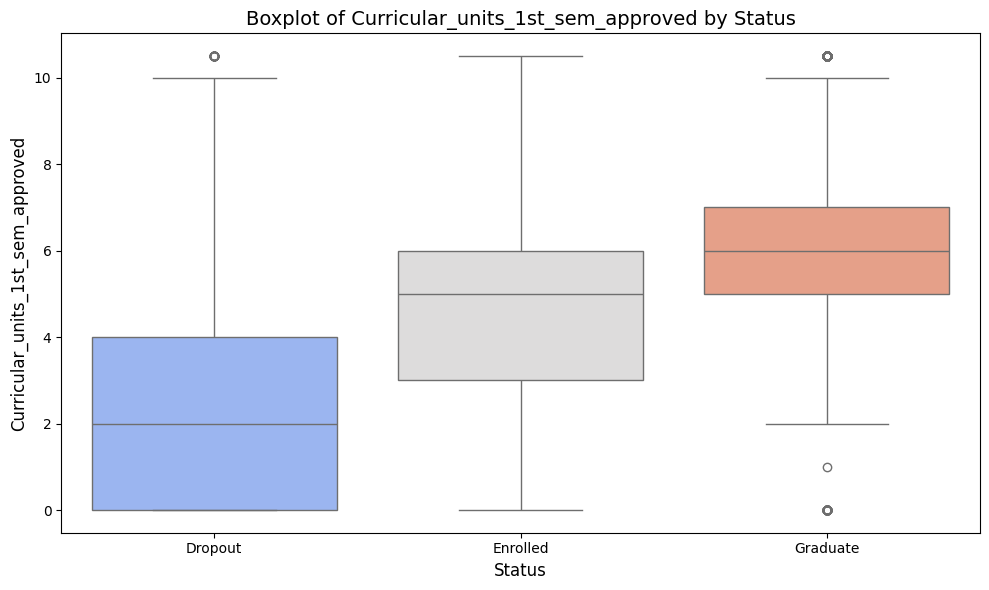

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


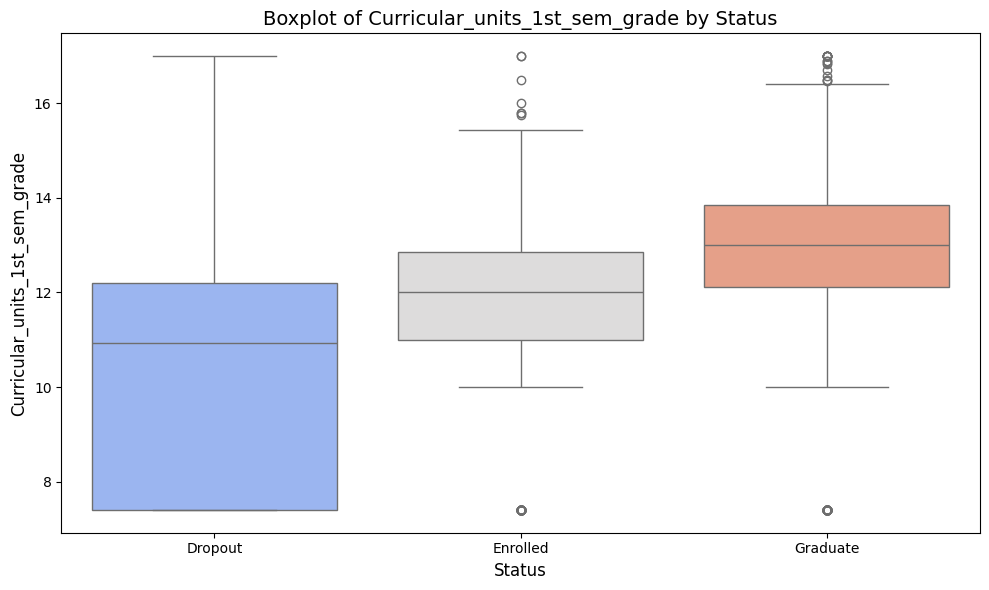

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


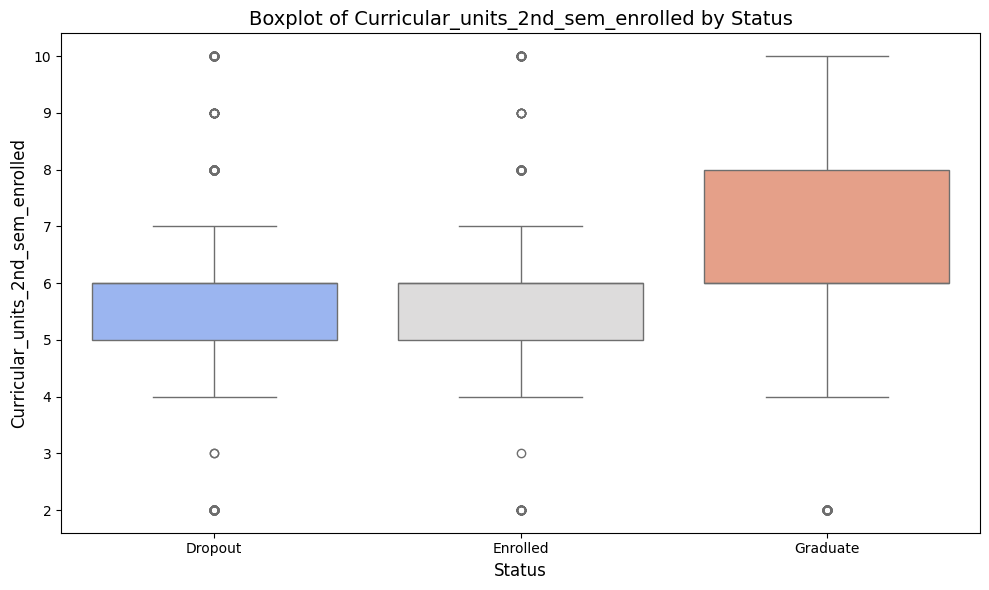

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


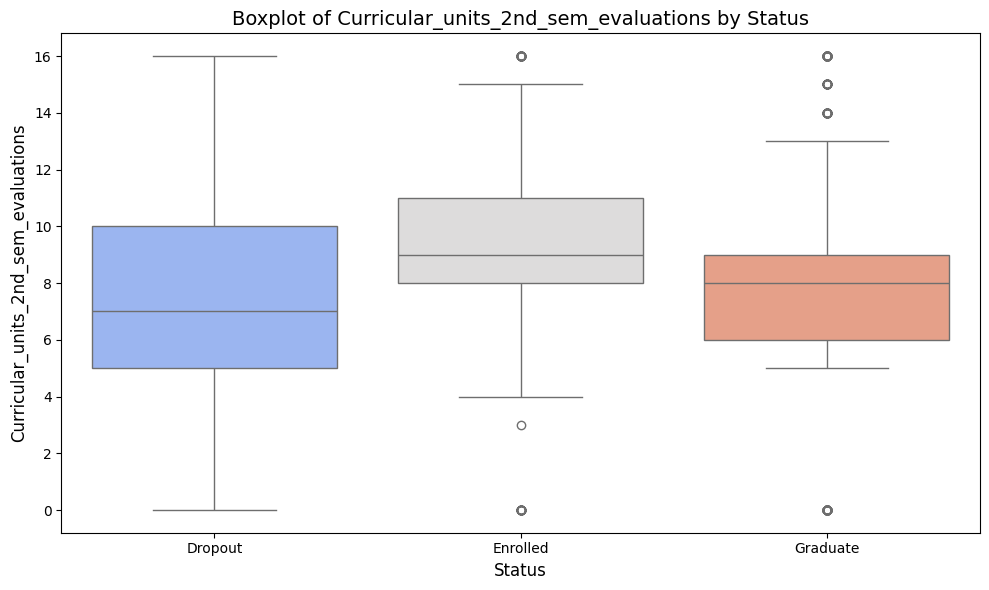

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


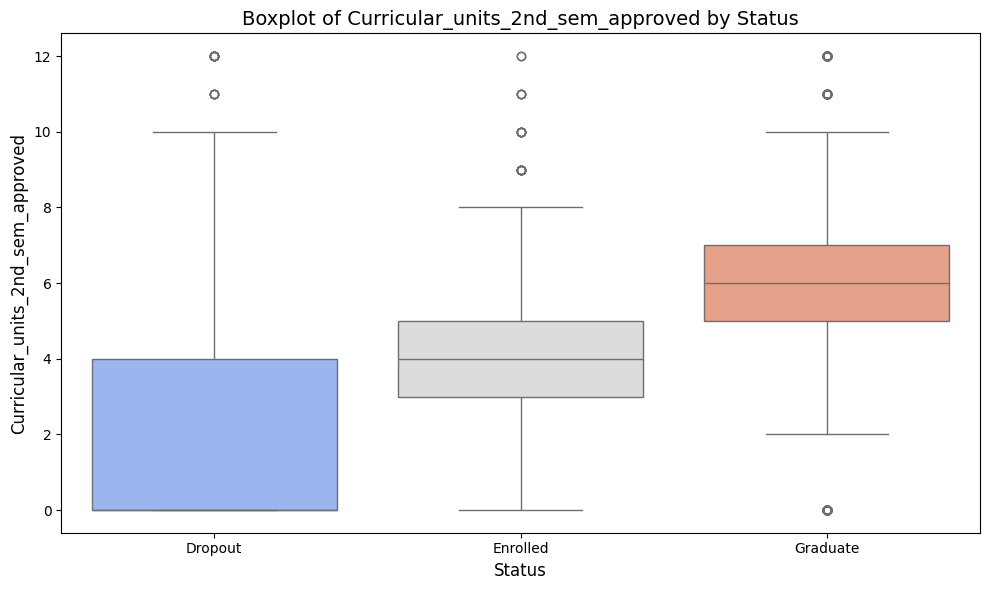

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


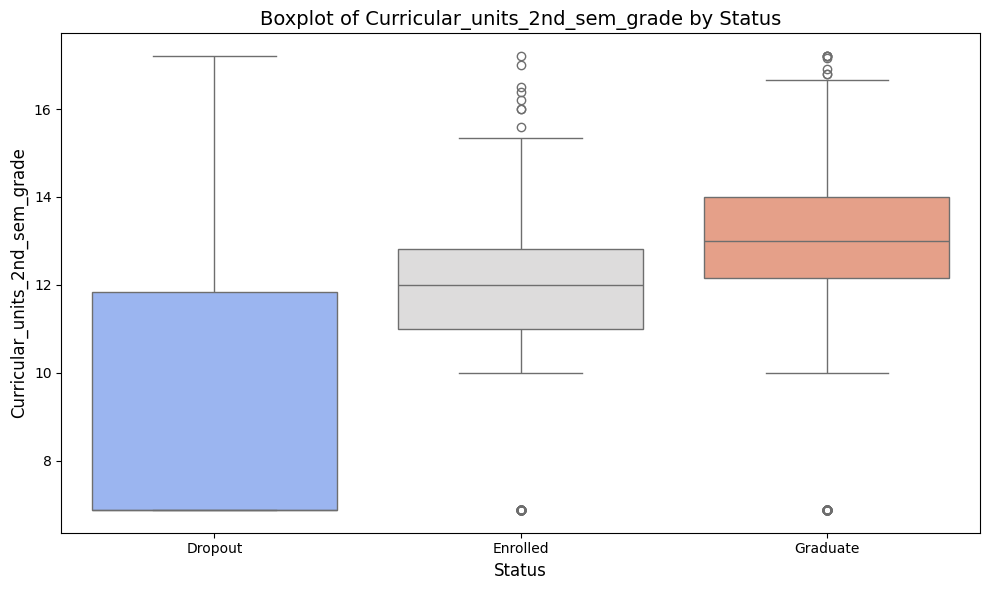

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


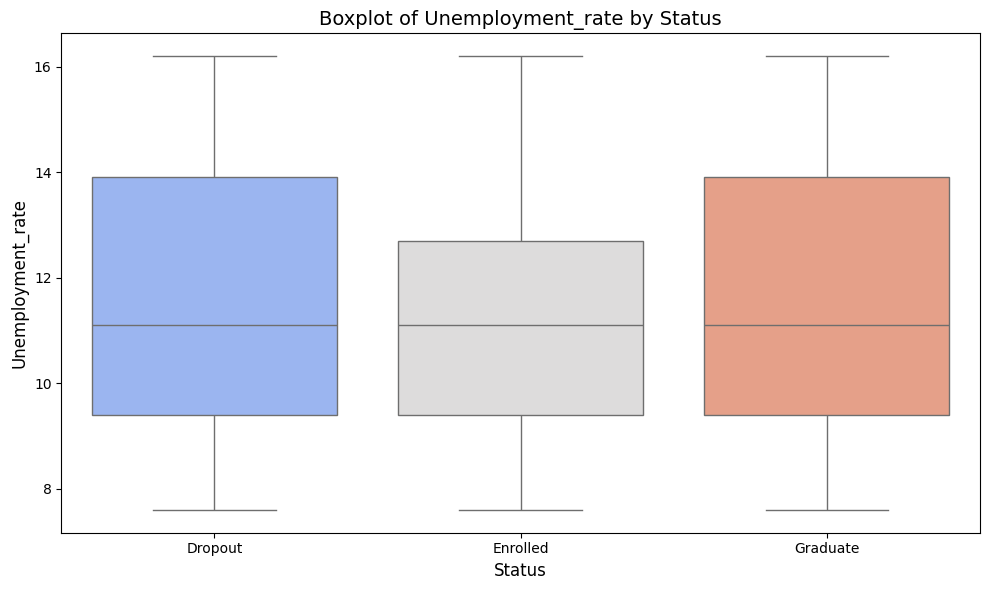

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


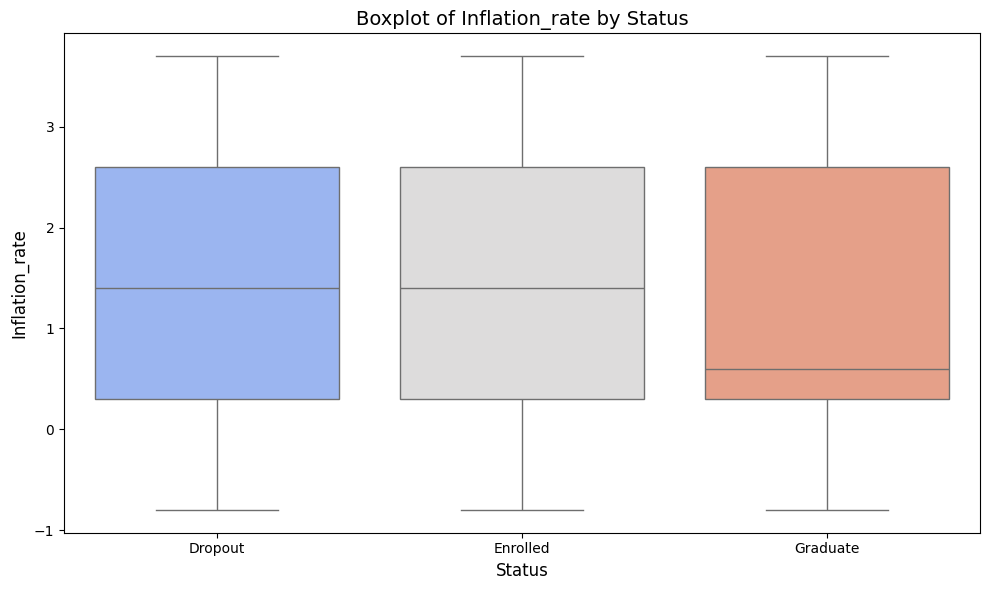

<ipython-input-21-6fce72e1b33a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.


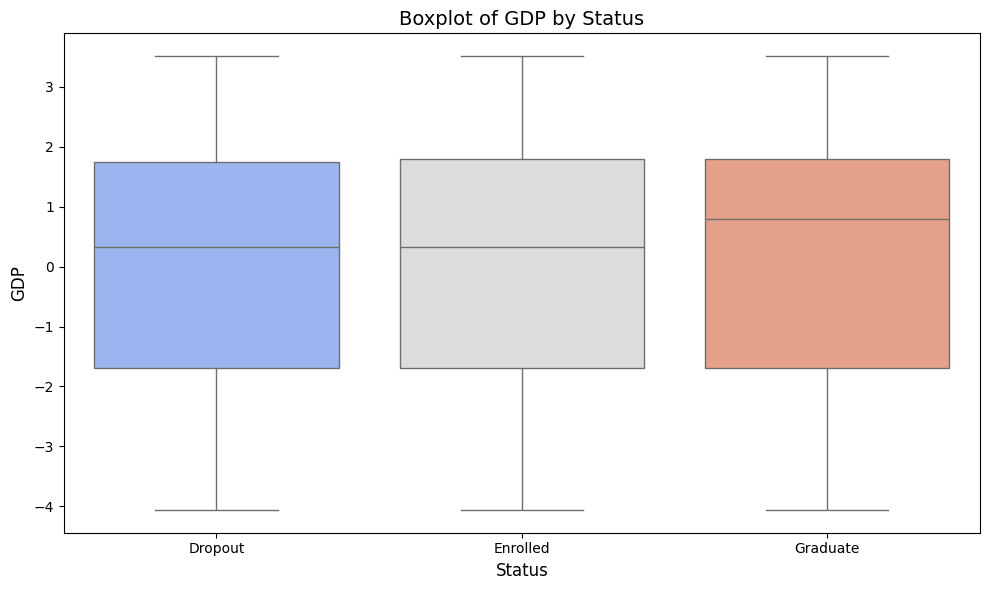

In [ ]:
# Daftar kolom numerik
numerical_cols = ['Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP'] # Mendefinisikan list yang berisi nama-nama kolom numerik dalam dataset.

# Membuat boxplot untuk setiap kolom numerik berdasarkan Status
for col in numerical_cols: # Melakukan iterasi untuk setiap kolom numerik dalam list numerical_cols.
    plt.figure(figsize=(10, 6))  # Ukuran figure
    sns.boxplot(data=dataset, x='Status', y=col, palette='coolwarm') # Membuat boxplot untuk kolom 'col' berdasarkan 'Status' dengan data dari dataset dan palet warna 'coolwarm'.
    plt.title(f'Boxplot of {col} by Status', fontsize=14) # Menambahkan judul boxplot dengan nama kolom dan 'Status'.
    plt.xlabel('Status', fontsize=12) # Menambahkan label sumbu x dengan teks 'Status' dan ukuran font 12.
    plt.ylabel(col, fontsize=12) # Menambahkan label sumbu y dengan nama kolom dan ukuran font 12.
    plt.xticks(rotation=0, fontsize=10) # Mengatur rotasi dan ukuran font label sumbu x.
    plt.tight_layout()  # Mengatur layout agar elemen-elemen plot tidak tumpang tindih.
    plt.show() # Menampilkan boxplot yang telah dibuat.

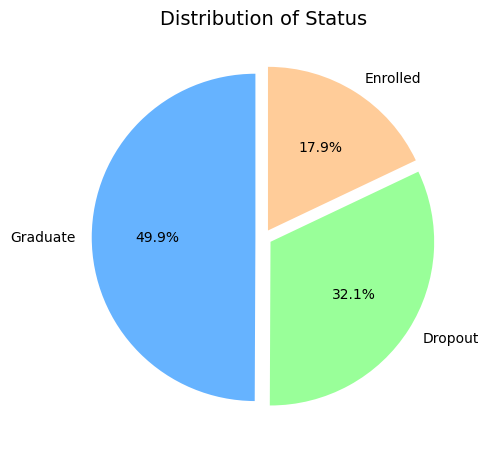

In [ ]:
# Menghitung jumlah masing-masing kategori dalam kolom Status
status_counts = dataset['Status'].value_counts() # Menghitung jumlah masing-masing kategori 'Status' dan menyimpannya dalam variabel 'status_counts'.

# Membuat pie chart
plt.figure(figsize=(5, 5))  # Ukuran figure
status_counts.plot.pie(
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,      # Memulai dari sudut 90 derajat
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'],  # Palet warna
    explode=[0.05] * len(status_counts),  # Sedikit jarak antar kategori
    labels=status_counts.index           # Memberi label dari index
)

# Menambahkan judul
plt.title('Distribution of Status', fontsize=14) # Menambahkan judul pie chart.
plt.ylabel('')  # Menghilangkan label y untuk tampilan bersih
plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show() # Menampilkan pie chart.

In [ ]:
# Menghapus spasi atau karakter tersembunyi pada nilai 'Status'
dataset['Status'] = dataset['Status'].str.strip() # Membersihkan kolom 'Status' dari spasi atau karakter tersembunyi (seperti tab, newline)
                                                # yang mungkin ada di awal atau akhir nilai dalam kolom tersebut.

# Menghapus baris dengan Status = 'Enrolled'
dataset = dataset[dataset['Status'] != 'Enrolled'] # Menghapus baris-baris dalam DataFrame dataset yang memiliki nilai 'Enrolled'
                                                  # pada kolom 'Status', karena status 'Enrolled' dianggap tidak relevan
                                                  # untuk analisis prediksi kelulusan atau dropout.

In [ ]:
dataset['Status'].value_counts() # Menghitung dan menampilkan frekuensi/jumlah setiap kategori unik dalam kolom 'Status'.

,count
Status,
Graduate,2209
Dropout,1421


In [ ]:
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0.0,7.400000,2,0,0,6.875000,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,6.0,14.000000,6,6,6,13.666667,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0.0,7.400000,6,0,0,6.875000,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,6.0,13.428571,6,10,5,12.400000,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,5.0,12.333333,6,6,6,13.000000,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,5.0,13.600000,6,8,5,12.666667,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,6.0,12.000000,6,6,2,11.000000,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,7.0,14.912500,8,9,1,13.500000,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,5.0,13.800000,5,6,5,12.000000,9.4,-0.8,-3.12,Graduate


In [ ]:
dataset.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,5


In [ ]:
dataset[dataset['Fathers_qualification'].isnull()]

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status
926,single,Holders of other higher courses,1,Veterinary Nursing,daytime,Higher education - degree,140.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,NaN,...,1.0,14.000000,5,12,0,6.875,10.8,1.4,1.74,Dropout
1388,single,2nd phase - general contingent,6,Informatics Engineering,daytime,Secondary education,129.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,NaN,...,0.0,7.400000,5,5,0,6.875,7.6,2.6,0.32,Dropout
3666,married,Transfer,1,Communication Design,daytime,Secondary education,170.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,NaN,...,8.0,14.625000,7,7,5,13.400,9.4,-0.8,-3.12,Dropout
3847,single,2nd phase - general contingent,1,Journalism and Communication,daytime,Secondary education,127.0,Portuguese,Secondary Education - 12th Year of Schooling o...,NaN,...,0.0,7.400000,5,10,0,6.875,10.8,1.4,1.74,Dropout
4328,married,Change of course,2,Basic Education,daytime,Secondary education,130.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,NaN,...,6.0,13.666667,6,8,5,13.500,9.4,-0.8,-3.12,Dropout


In [ ]:
dataset.dropna(inplace=True)

<ipython-input-28-c5a91072ea31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3605 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Marital_status                        3605 non-null   category
 1   Application_mode                      3605 non-null   category
 2   Application_order                     3605 non-null   category
 3   Course                                3605 non-null   category
 4   Daytime_evening_attendance            3605 non-null   category
 5   Previous_qualification                3605 non-null   category
 6   Previous_qualification_grade          3605 non-null   category
 7   Nacionality                           3605 non-null   category
 8   Mothers_qualification                 3605 non-null   category
 9   Fathers_qualification                 3605 non-null   category
 10  Mothers_occupation                    3605 non-null   category
 11  Fathers_o

In [ ]:
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0.0,7.400000,2,0,0,6.875000,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,6.0,14.000000,6,6,6,13.666667,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0.0,7.400000,6,0,0,6.875000,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,6.0,13.428571,6,10,5,12.400000,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,5.0,12.333333,6,6,6,13.000000,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,5.0,13.600000,6,8,5,12.666667,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,6.0,12.000000,6,6,2,11.000000,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,7.0,14.912500,8,9,1,13.500000,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,5.0,13.800000,5,6,5,12.000000,9.4,-0.8,-3.12,Graduate


In [ ]:
# Mengecek kolom bertipe kategori
category_columns = dataset.select_dtypes(include=['category', 'object']).columns

# Membuat dictionary untuk menyimpan encoder
encoders = {}

# Iterasi setiap kolom kategori untuk melakukan encoding
for column in category_columns:
    encoder = LabelEncoder()
    dataset[column] = encoder.fit_transform(dataset[column])
    encoders[column] = encoder  # Simpan encoder untuk kolom tersebut

# Menyimpan encoder ke file
joblib_path = "encoder.joblib"
joblib.dump(encoders, joblib_path)

['encoder.joblib']

In [ ]:
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status
0,4,3,5,2,0,15,28,13,9,22,...,0.0,7.400000,2,0,0,6.875000,10.8,1.4,1.74,0
1,4,9,1,15,0,15,78,13,24,16,...,6.0,14.000000,6,6,6,13.666667,13.9,-0.3,0.79,1
2,4,0,5,5,0,15,28,13,10,10,...,0.0,7.400000,6,0,0,6.875000,10.8,1.4,1.74,0
3,4,3,2,8,0,15,28,13,8,10,...,6.0,13.428571,6,10,5,12.400000,9.4,-0.8,-3.12,1
4,3,14,1,14,1,15,4,13,10,8,...,5.0,12.333333,6,6,6,13.000000,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,4,0,6,8,0,15,33,13,24,24,...,5.0,13.600000,6,8,5,12.666667,15.5,2.8,-4.06,1
4420,4,0,2,8,0,15,26,15,24,24,...,6.0,12.000000,6,6,2,11.000000,11.1,0.6,2.02,0
4421,4,0,1,11,0,15,71,13,10,10,...,7.0,14.912500,8,9,1,13.500000,13.9,-0.3,0.79,0
4422,4,0,1,9,0,15,96,13,10,10,...,5.0,13.800000,5,6,5,12.000000,9.4,-0.8,-3.12,1


In [ ]:
dataset.to_csv('finaldata.csv', index=False)

In [ ]:
dataset.Marital_status.value_counts()

,count
Marital_status,
4,3177
3,324
0,75
1,22
2,5
5,2


Insight:

1. Data Kategorikal:

- ilai numerik di-mapping ke teks deskriptif.
- Tipe data diubah ke 'category'.
- Label Encoding diterapkan untuk representasi numerik.

2. Outlier:

- Diidentifikasi dan ditangani dengan metode IQR.
- Custom transformer dan pipeline digunakan.

3. Data Cleaning:

- Spasi dan karakter tersembunyi dihapus pada kolom 'Status'.
- Baris dengan status 'Enrolled' dihapus.

## Modelling

- Split Data

In [ ]:
# Pisahkan fitur dan target (kolom 'Status' sebagai target)
X = dataset.drop(columns=['Status']) # Memisahkan fitur (X) dengan menghapus kolom 'Status' dari dataset.
y = dataset['Status'] # Memisahkan target (y) dengan mengambil kolom 'Status' dari dataset.

In [ ]:
# Membagi data menjadi data latih (train) dan data uji (test) dengan rasio 80:20 dan stratifikasi berdasarkan target.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

,count
Status,
1,1753
0,1131


- Oversampling

In [ ]:
# Terapkan SMOTE untuk oversampling pada data numerik dan kategori
smote = SMOTE(random_state=42) # Inisialisasi objek SMOTE dengan random_state=42 untuk reproduktibilitas.
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # Melakukan oversampling pada data latih (X_train, y_train)
                                                               # menggunakan SMOTE dan menyimpan hasilnya di X_resampled dan y_resampled.

In [ ]:
y_resampled.value_counts()

,count
Status,
1,1753
0,1753


In [ ]:
X_resampled.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

In [ ]:
X_resampled

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP
0,4,3,1,14,1,15,26,13,8,10,...,11,4.000000,12.000000,6,7,6,13.000000,10.800000,1.400000,1.740000
1,4,0,2,2,0,15,38,13,10,10,...,0,0.000000,7.400000,2,0,0,6.875000,7.600000,2.600000,0.320000
2,4,3,2,14,1,15,43,13,9,24,...,6,6.000000,11.666667,6,12,5,14.000000,10.800000,1.400000,1.740000
3,4,0,4,11,0,15,57,13,24,16,...,8,7.000000,14.565714,8,8,7,14.565714,10.800000,1.400000,1.740000
4,4,16,1,1,0,16,54,13,9,8,...,7,6.000000,12.857143,6,6,6,13.166667,12.400000,0.500000,1.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,4,1,2,12,0,15,17,14,8,18,...,12,2.290756,11.505882,5,13,0,7.983194,9.665209,1.825547,1.236437
3502,3,5,1,5,0,15,39,13,9,9,...,12,8.276566,11.640951,10,10,4,10.712761,10.094664,1.174478,1.531694
3503,4,8,1,13,0,8,54,13,16,16,...,9,4.481541,12.913590,6,7,1,9.104719,13.070337,-0.033323,1.154459
3504,1,9,1,6,0,9,54,13,10,10,...,5,0.766392,9.392620,5,5,0,6.875000,15.500000,2.800000,-4.060000


In [ ]:
# Kolom numerik dan kategori berdasarkan definisi Anda
numerical_cols = ['Previous_qualification_grade',
                  'Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP'] # Mendefinisikan list yang berisi nama-nama kolom numerik.

category_cols = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
] # Mendefinisikan list yang berisi nama-nama kolom kategori.

- Transformer Data

In [ ]:
# Buat transformer untuk numerik dan kategori
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
]) # Membuat pipeline untuk data numerik yang berisi tahapan StandardScaler untuk standarisasi data.

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
]) # Membuat pipeline untuk data kategorikal yang berisi tahapan OrdinalEncoder untuk mengubah data kategorikal menjadi numerik.
   # handle_unknown='use_encoded_value' dan unknown_value=-1 digunakan untuk menangani nilai yang tidak diketahui saat pengujian.

In [ ]:
# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, category_cols)
    ]
) # Membuat objek ColumnTransformer untuk menggabungkan transformer numerik dan kategorikal
  # dan menerapkannya pada kolom yang sesuai.
  # Transformer 'num' akan diterapkan pada kolom-kolom di numerical_cols, dan
  # transformer 'cat' akan diterapkan pada kolom-kolom di category_cols.

- Pipeline for Random Forest

In [ ]:
# Buat pipeline untuk model Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
]) # Membuat pipeline dengan tahapan preprocessor dan classifier (RandomForest).

- Train model

In [ ]:
# Latih model dengan data oversampling
pipeline.fit(X_resampled, y_resampled) # Melatih model (pipeline) menggunakan data yang telah di-oversampling (X_resampled dan y_resampled).

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Previous_qualification_grade',
                                                   'Admission_grade',
                                                   'Age_at_enrollment',
                                                   'Curricular_units_1st_sem_enrolled',
                                                   'Curricular_units_1st_sem_evaluations',
                                                   'Curricular_units_1st_sem_approved',
                                                   'Curricular_units_1st_sem_grade',
                                                   'Curricular_units_2...
                                                   'Application_order',
                                                   'Course',
                                                   'Daytime_evening_attendance',
                                                   'Previous_qualification',
                                                   'Nacionality',
                                                   'Mothers_qualification',
                                                   'Fathers_qualification',
                                                   'Mothers_occupation',
                                                   'Fathers_occupation',
                                                   'Displaced',
                                                   'Educational_special_needs',
                                                   'Debtor',
                                                   'Tuition_fees_up_to_date',
                                                   'Gender',
                                                   'Scholarship_holder',
                                                   'International'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

- Predict for data testing

In [ ]:
# Prediksi pada data uji
y_pred = pipeline.predict(X_test) # Melakukan prediksi pada data uji (X_test) menggunakan model (pipeline) yang telah dilatih
                                 # dan menyimpan hasilnya dalam variabel y_pred.

## Evaluation

- Classification Report

In [ ]:
# Evaluasi model
print("Classification Report:") # Menampilkan judul "Classification Report".
print(classification_report(y_test, y_pred)) # Menampilkan classification report yang berisi precision, recall, f1-score, dan support untuk setiap kelas.
                                            # y_test adalah target sebenarnya, dan y_pred adalah target yang diprediksi oleh model.

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       283
           1       0.88      0.95      0.91       438

    accuracy                           0.89       721
   macro avg       0.89      0.88      0.88       721
weighted avg       0.89      0.89      0.89       721



- Confusion Matrix

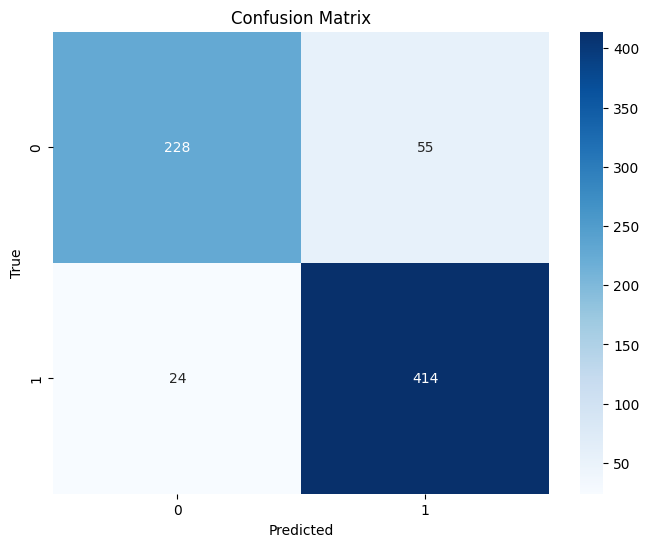

In [ ]:
cm = confusion_matrix(y_test, y_pred) # Menghitung confusion matrix dengan membandingkan nilai target sebenarnya (y_test) dengan nilai target yang diprediksi (y_pred).

plt.figure(figsize=(8,6)) # Membuat figure baru dengan ukuran 8x6 inci untuk menampilkan heatmap confusion matrix.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_) # Membuat heatmap confusion matrix menggunakan Seaborn.
                                                                                                                # `annot=True`: Menampilkan nilai numerik pada setiap sel heatmap.
                                                                                                                # `fmt='d'`: Format nilai numerik sebagai integer.
                                                                                                                # `cmap='Blues'`: Menggunakan colormap 'Blues' untuk heatmap.
                                                                                                                # `xticklabels` dan `yticklabels`: Memberikan label untuk sumbu x dan y menggunakan kelas-kelas dari model (pipeline.classes_).
plt.xlabel('Predicted') # Menambahkan label untuk sumbu x.
plt.ylabel('True') # Menambahkan label untuk sumbu y.
plt.title('Confusion Matrix') # Menambahkan judul untuk heatmap confusion matrix.
plt.show() # Menampilkan heatmap confusion matrix.

- Save Model

In [ ]:
# Simpan model yang telah dilatih
joblib.dump(pipeline, 'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']